<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Chapter 0 Installment Extra Packages**

#####**Install Some Packages**

In [58]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####**Import Basic Modules**

In [59]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

#####**import compute_z_confidence_interval**

In [60]:
def compute_z_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_t_confidence_interval**

In [61]:
def compute_t_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    t_star = stats.t(df=n-1).ppf( 1 - (alpha/2) )
    margin_of_error = t_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_proportion_confidence_interval**

In [64]:
def compute_proportion_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
                   data items are either 0 or 1
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    p_hat = data.mean(axis=1) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * np.sqrt( p_hat * ( 1 - p_hat ) / n ) # (30,) 

    return p_hat, margin_of_error  

#**PART I SAMPLING**

### ***Chapter 1 Sample Surveys***

###### Not Google Translation from Statistics to Probability

$$\begin{array}{cc}
\text{Statistics}&\text{Probability}\\\hline
\text{population}&\Omega\\
\text{sample}&X\\
\text{samples}&X_1,\cdots,X_n\\
\text{parameter}&\theta=\text{parameter of distribution of }X\\
\text{statistic}&f(X_1,\cdots,X_n)\\
\text{estimator}&\hat\theta=\text{statistic to estimate }\theta\\
\text{unbiased estimator}&\hat\theta \text{ with }E(\hat\theta)=\theta\\
\text{sampling distribution}&\text{distribution of }f(X_1,\cdots,X_n)\\
\text{population mean}&\mu=E(X)\\
\text{SD}&\sigma=\sqrt{Var(X)}\\
\text{SE}&\sqrt{Var(f(X_1,\cdots,X_n))}\\
\end{array}$$

###### FDR vs Landon (1936)

$$\begin{array}{lcr}
&\text{FDR Percentage}&\text{Sample Size}\\\hline
\text{Election Outcome}&62\\
\text{Digest's Prediction}&43&2,400,000\\
\text{Gallup's Prediction of Digest's Prediction}&44&3,000\\
\text{Gallup's Prediction}&56&50,000\\
\end{array}$$

selection bias

non-response bias



###### Truman vs Dewey (1948)

<img src="https://www.chicagotribune.com/resizer/LJ7iVKp1nvFWGs5pDnYBekQpdQM=/800x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/tronc/ZC6FYT4FWNEVNMYQJFQWT4ZZX4.jpg">

Sorce [‘Dewey Defeats Truman’: Tribune’s most famous headline, and the man who was once ‘chief molder’ of Chicago](https://www.chicagotribune.com/175/ct-175-anniversary-chicago-tribune-history-1933-1955-20220605-gwj73yl6bvh2jgxz3ur66waesi-story.html)

$$\begin{array}{lcr}
&\text{Truman Percentage}&\text{Dewey Percentage}\\\hline
\text{Election Outcome}&50&45\\
\text{Crossley's Prediction}&45&50\\
\text{Gallup's Prediction}&44&50\\
\text{Roper's Prediction}&38&53\\
\end{array}$$

quota sampling (human choice) in favor of Republicans

$$\begin{array}{cccc}
&\text{Gallup's prediction of}&\text{Actual}&\text{Bias in favor of}\\
\text{Year}&\text{Republican vote}&\text{Republican vote}&\text{Republicans}\\\hline
1936&44&38&6\\
1940&48&45&3\\
1944&48&46&2\\
1948&50&45&5\\
\end{array}$$

###### various ways of sampling

simple random sampling

multistage cluster sampling

random digit dialing (RDD)

multistage cluster sampling

<img src="http://ccnmtl.columbia.edu/projects/qmss/images/surveydiagram.gif">

Sorce [QMSS e-Lessons](https://ccnmtl.columbia.edu/projects/qmss/samples_and_sampling/types_of_sampling.html)

###### survivorship bias

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Survivorship-bias.svg/600px-Survivorship-bias.svg.png">

Sorce [Survivorship bias](https://en.wikipedia.org/wiki/Survivorship_bias)

#**PART II DESIGN OF EXPERIMENTS**

###**Chapter 2 Experimental Design**

###### **controlled experiments**


<img src="https://cdn.kastatic.org/ka-perseus-images/e604b30b69e2a0ca4b771622cbf94234b97358f9.png">

Source : [Controlled experiments](https://www.khanacademy.org/science/biology/intro-to-biology/science-of-biology/a/experiments-and-observations)

UC버클리 심리학과 연구팀은 쥐를 두 집단으로 나누어 실험을 했다. 풍요로운 환경에서 다채로운 경험을 한 쥐는 결핍된 환경에서 생활한 쥐보다 뇌 피질이 무겁고 빽빽해 고차원적 활동에 적합하고 복원력도 강했다. 이렇게 보면 이색 경험과 재미를 추구하는 ‘펀(fun)슈머’ 트렌드가 강조되는 건 단순히 기업의 상술 때문만이 아니라 생활 수준 향상에 따른 자연스러운 현상이다.

Sorce [코스트코 핫도그 판매대, 출구 근처에 있는 이유](https://www.chosun.com/economy/mint/2023/01/12/QWDCEMUVX5HTLBEAVZNOLZTDFE/)

###### **randomised controlled experiments**

Control what you can and randomize the rest.

<img src="https://emj.bmj.com/content/emermed/20/2/164/F1.medium.gif">

Image Source : [Designing a research project: randomised controlled trials and their principles](https://emj.bmj.com/content/20/2/164)

###### **double-blind randomized controlled experiment (the best practice)**

<img src="https://bodymindandbrain.com.au/wp-content/uploads/DoubleBlind-e1573673971469.jpg">

Image Source : [Is it proven by randomised, double-blind, placebo-controlled clinical trials?](https://bodymindandbrain.com.au/is-it-proven-by-randomised-double-blind-placebo-controlled-clinical-trials/)

Salk vaccine field trival

$$\begin{array}{cc}
\text{best practice}&\text{NFIP}\\
% best practice result (start)
\begin{array}{lcc}\hline
&\text{Size}&\text{Rate}\\
\text{Treatment}&200,000&28\\
\text{Control}&200,000&71\\
\text{No Consent}&350,000&46\\
\end{array}
% best practice result (end)
&
% NFIP result (start)
\begin{array}{lcc}\hline
&\text{Size}&\text{Rate}\\
\text{Grade 2 (Vaccine)}&225,000&25\\
\text{Grades 1 and 3 (Control)}&725,000&54\\
\text{Grade 2 (No Consent)}&125,000&44\\
\end{array}
% NFIP result (end)
\end{array}$$

three-year survival rates in studies of the portacaval shunt

$$\begin{array}{lcc}
&\text{randomized}&\text{not randomized}\\\hline
\text{Surgery}&60\%&60\%\\
\text{Control}&60\%&45\%\\
\end{array}$$

randomized controlled vs historically controlled

$$\begin{array}{ccc}
&\text{randomized controlled}&\text{historically controlled}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{Coronary bypass surgery}\\
\text{5-FU}\\
\text{BCG}\\
\text{DES}\\
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
+&-\\
1&7\\
0&5\\
2&2\\
0&3
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{rc}
+&-\\
16&5\\
2&0\\
4&0\\
5&0
\end{array}
% third column (end)
\end{array}$$

##### **related concepts**

placebo

<img src="https://cdn.vox-cdn.com/thumbor/NXgQS5QN8cANG49icetyexyAl5g=/0x0:2962x1566/1520x0/filters:focal(0x0:2962x1566):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/8803615/500PX_500PX.jpg">

Image Source : [The weird power of the placebo effect, explained](https://www.vox.com/science-and-health/2017/7/7/15792188/placebo-effect-explained)

### **Chapter 3 Obsevational Studies**

###### **confounding (mixed up)**

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128142769000143-f14-02-9780128142769.jpg">

Image Source : [Confounder](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/confounder)

###### **controlled experiments vs observational studies**

$$\begin{array}{ccc}
&\text{controlled experiments}&\text{observational studies}\\\hline
\text{who choose group}&\text{investigators}&\text{subjects}\\
\text{confounding}&\text{no confounding}&\text{many confounding}\\
\text{how to reduce confounding}&\text{no need}&\text{divide into smaller and more homogeneous groups}\\
\end{array}$$

###### **observational studies**

UC Berkeley graduate program gender bias

$$\begin{array}{ccc}
&\text{Men}&\text{Women}\\
% first column (start)
\begin{array}{c}
\\
\text{Major}\\\hline
\text{A}\\
\text{B}\\
\text{C}\\
\text{D}\\
\text{E}\\
\text{F}\\
\end{array}&
% first column (end)
% second column (start)
\begin{array}{rr}
\text{Number of}&\text{Percent}\\
\text{applicants}&\text{admitted}\\\hline
825&62\\
560&63\\
325&\bf{37}\\
417&33\\
191&\bf{28}\\
373&6\\
\end{array}&
% second column (end)
% third column (start)
\begin{array}{rr}
\text{Number of}&\text{Percent}\\
\text{applicants}&\text{admitted}\\\hline
108&\bf{82}\\
25&\bf{68}\\
593&34\\
375&\bf{35}\\
393&24\\
341&\bf{7}\\
\end{array}
% third column (end)
\end{array}$$

In [ ]:
import pandas as pd

major = ["A","B","C","D","E","F"]
n_male = [825,560,325,417,191,373]
p_male = [0.62,0.63,0.37,0.33,0.28,0.06]
n_female = [108,25,593,375,393,341]
p_female = [0.82,0.68,0.34,0.35,0.24,0.07]
data = {"major":major,"n_male":n_male,"p_male":p_male,"n_female":n_female,"p_female":p_female}
df = pd.DataFrame(data).set_index("major")
#print(df)

prob_male_admitted = (df.n_male * df.p_male).sum() / df.n_male.sum() 
print(prob_male_admitted) # 44%

prob_female_admitted = (df.n_female * df.p_female).sum() / df.n_female.sum() 
print(prob_female_admitted) # 30%

0.44519509476031216
0.3033351498637602


연습문제 1. [“내시경 검사, 대장암 사망률 못 낮춘다” 네이처 논문에 시끌](https://www.chosun.com/economy/2023/01/12/2DTVR57S3JCANHVMBFPILO3D7A/) 이 기사를 읽고 다음의 참 거짓을 판단하라.
$$\begin{array}{ll}
(a)&\text{This is an observational study.}\\
(b)&\text{There is an non-response bias.}\\
\end{array}$$

연습문제 2. [암 사망률 30% 낮추려면... 하루 딱 4분만 이 운동하라](https://www.chosun.com/culture-life/health/2023/01/11/XWE7PYUQUVGTHPN4MCWBLCJT2I/) 이 기사를 읽고 다음의 참 거짓을 판단하라.
$$\begin{array}{ll}
(a)&\text{This is a controlled experiment.}\\
\end{array}$$

###### **Simpson's paradox**

batting averages

$$\begin{array}{cccc}
&1995&1996&\text{combined}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{Derek Jeter}\\
\text{David Justice}
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
12/48&.250\\
104/411&\bf{.253}\\
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
183/582&.314\\
45/140&\bf{.321}\\
\end{array}
% third column (end)
&
% fourth column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
195/630&\bf{.310}\\
149/551&.270\\
\end{array}
% fourth column (end)
\end{array}$$

kidney stone treatment

$$\begin{array}{cccc}
&\text{small stones}&\text{large stones}&\text{combined}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{treatment A}\\
\text{treatment B}
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
81/87&\bf{.93}\\
234/270&.87\\
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
192/263&\bf{.73}\\
55/80&.69\\
\end{array}
% third column (end)
&
% fourth column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
273/350&.78\\
289/350&\bf{.83}\\
\end{array}
% fourth column (end)
\end{array}$$

###### **association is not the same as causation**

<img src="https://miro.medium.com/max/1000/0*1TFsNtDIUqwWaian">

Source [Correlation vs Causation in Data Science](https://sundaskhalid.medium.com/correlation-vs-causation-in-data-science-66b6cfa702f0)

#***PART III DESCRIPTIVE STATISTICS***

### ***Chapter 4 Histogram***

###### histogram

loans income

                  x
count   50000.00000
mean    68760.51844
std     32872.03537
min      4000.00000
25%     45000.00000
50%     62000.00000
75%     85000.00000
max    199000.00000


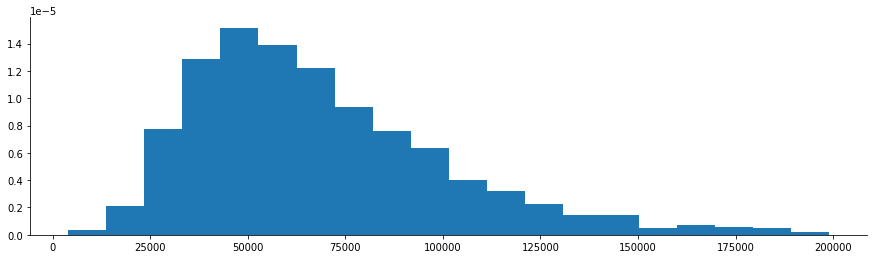

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
#print(df.shape)
print(df.describe())

# draw the distribution of the original data
fig, ax = plt.subplots(figsize=(15,4))
ax.hist(df.x,bins=20,density=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

titanic

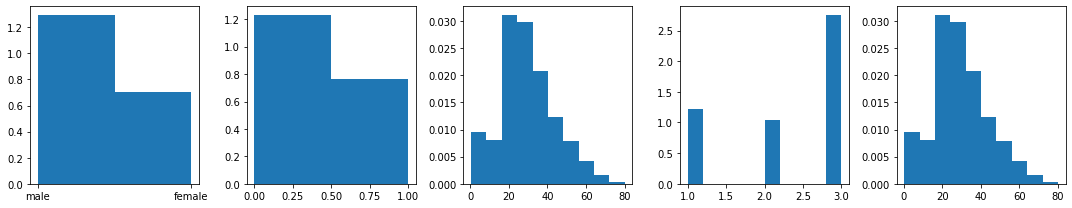

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
#print(df.head())

# histogram
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5,figsize=(15,3))
ax0.hist(df.Sex,density=True,bins=2)
ax1.hist(df.Survived,density=True,bins=2)
ax2.hist(df.Age,density=True)
ax3.hist(df.Pclass,density=True)
ax4.hist(df.Age,density=True)
plt.tight_layout()
plt.show()

housing

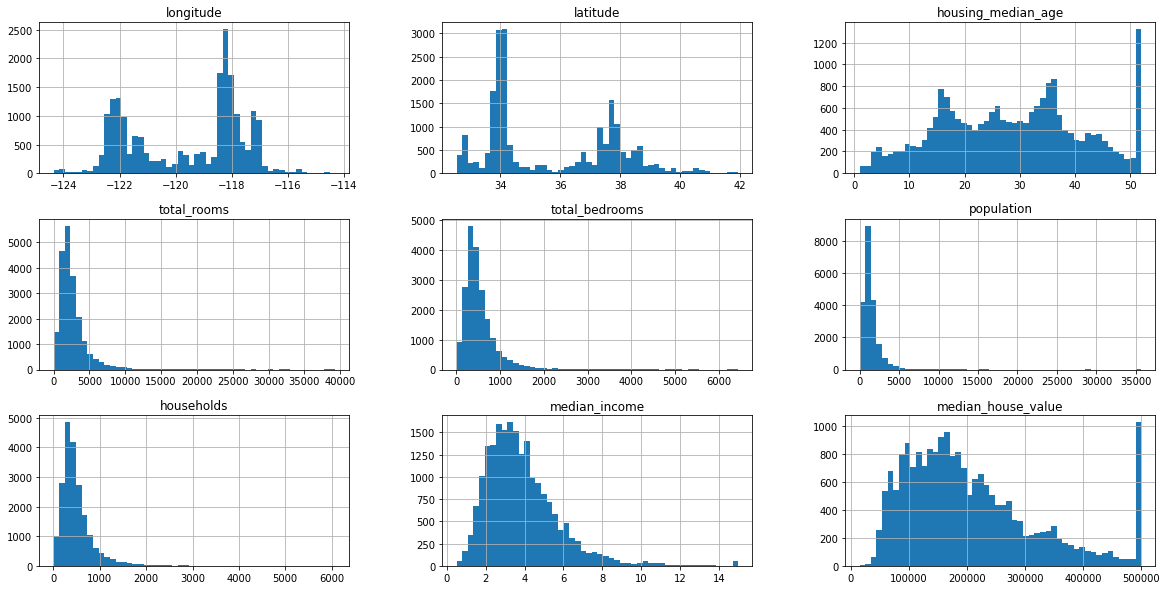

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
df = load_housing_data()

# histogram
df.hist(bins=50, figsize=(20,10))
plt.show()

###### distribution table to histogram

$$\begin{array}{rr}
\text{income level (\$)}&\text{percent}\\\hline
0-\ \ 1,000&1\\
1,000-\ \ 2,000&2\\
2,000-\ \ 3,000&3\\
3,000-\ \ 4,000&4\\
4,000-\ \ 5,000&5\\
5,000-\ \ 6,000&5\\
6,000-\ \ 7,000&5\\
7,000-10,000&15\\
10,000-15,000&26\\
15,000-25,000&26\\
25,000-50,000&8\\
\end{array}$$

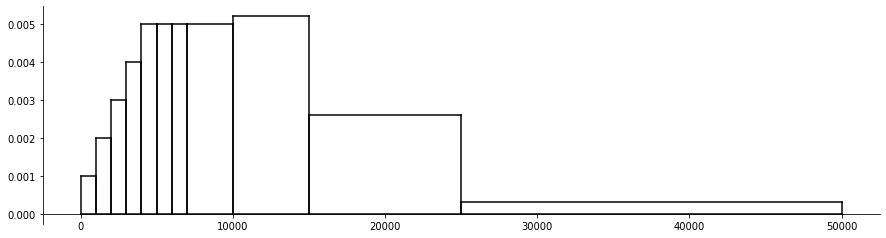

In [ ]:
import matplotlib.pyplot as plt

# compute widths
bins = [0,1_000,2_000,3_000,4_000,5_000,6_000,7_000,10_000,15_000,25_000,50_000]
widths = []
for left, right in zip(bins[:-1],bins[1:]):
    widths.append( right - left )

# compute heights
percents = [1,2,3,4,5,5,5,15,26,26,8]
heights = []
for width, percent in zip(widths,percents):
    heights.append( percent / width )

def draw_line(start,end,ax):
    ax.plot([start[0],end[0]],[start[1],end[1]],'-k')

def draw_box(x_left,x_right,height,ax):
    start = [x_left,0]
    end = [x_right,0]
    draw_line(start,end,ax)
    start = [x_right,0]
    end = [x_right,height]
    draw_line(start,end,ax)
    start = [x_right,height]
    end = [x_left,height]
    draw_line(start,end,ax)
    start = [x_left,height]
    end = [x_left,0]
    draw_line(start,end,ax)

# draw histogram
fig, ax = plt.subplots(figsize=(15,4))
for x_left, x_right, height in zip(bins[:-1],bins[1:],heights):
    draw_box(x_left,x_right,height,ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position("zero")
plt.show()

###### distribution table to cumulative histogram (or ogive)

$$\begin{array}{rrr}
\text{income level (\$)}&\text{percent}&\text{cum percent}\\\hline
0-\ \ 1,000&1&1\\
1,000-\ \ 2,000&2&3\\
2,000-\ \ 3,000&3&6\\
3,000-\ \ 4,000&4&10\\
4,000-\ \ 5,000&5&15\\
5,000-\ \ 6,000&5&20\\
6,000-\ \ 7,000&5&25\\
7,000-10,000&15&40\\
10,000-15,000&26&66\\
15,000-25,000&26&92\\
25,000-50,000&8&100\\
\end{array}$$

12


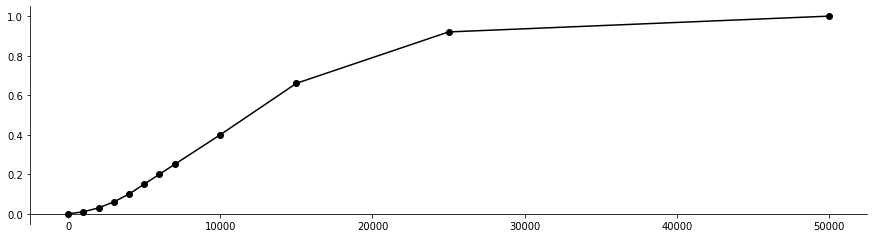

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# compute widths
bins = [0,1_000,2_000,3_000,4_000,5_000,6_000,7_000,10_000,15_000,25_000,50_000]
print(len(bins))

# compute cdf
probs = np.array([0,1,2,3,4,5,5,5,15,26,26,8]) / 100
cum_probs = probs.cumsum()

# draw ogive
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(bins,cum_probs,'-ok')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position("zero")
plt.show()

###### box plot

<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/Math-imagesArtboard-1-copy-13-8.png">

Sorce [Box and Whisker Plot](https://byjus.com/maths/box-and-whisker-plot/)

titanic

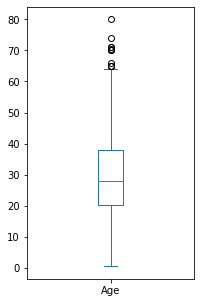

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
# print(df)

# box plot
fig, ax = plt.subplots(figsize=(3,5))
df.Age.plot(kind='box',ax=ax)
plt.show()

with outlier and without outlier

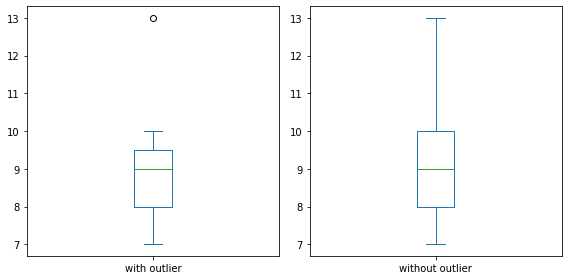

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd

def main():
    fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,4))
    
    data = pd.Series([13,9,10,8,7,10,9,8,9,8,9], name="with outlier")
    data.plot(kind='box', ax=ax0)
    
    data = pd.Series([13,9,10,8,7,10,9,8,9,8,9]+[12], name="without outlier")
    data.plot(kind='box', ax=ax1)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

###### variable

$$
\text{variable}
\left\{
    \begin{array}{l}
    \text{numerical}
    \left\{
        \begin{array}{l}
        \text{continuous}
        \\
        \text{discrete}
    \end{array}
    \right.
    \\
    \text{categorical}
    \end{array}
\right.
$$

### ***Chapter 5 Statistics***

###### mean and median

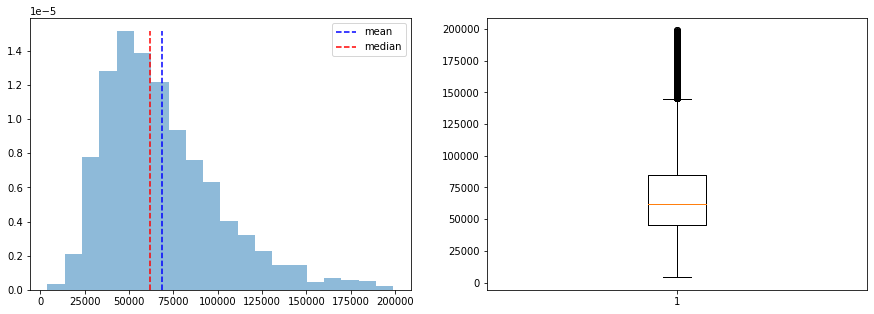

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
median = df.x.median()

# histogram and box plot 
# long right hand tail
# meadin < mean
# if data is not symmetric, meadian is better to locate the center of data
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
ax0.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
ax0.plot([median,median],[0,n.max()],'--r',label='median') # median
ax0.legend()
ax1.boxplot(df.x)
plt.show()

###### standard deviation and inter quantile range

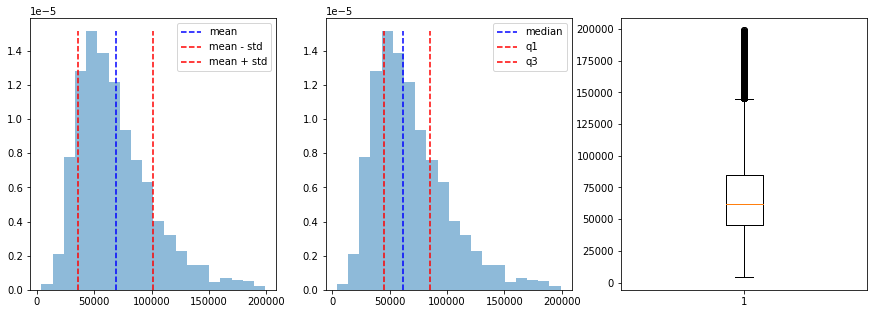

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
median = df.x.median()
std = df.x.std()
iqr = stats.iqr(df.x)
q1 = df.describe().loc['25%','x']
q3 = df.describe().loc['75%','x']

# histogram and box plot 
# long right hand tail
# meadin < mean
# if data is not symmetric, meadian is better to locate the center of data
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,5))
n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
ax0.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
ax0.plot([mean-std,mean-std],[0,n.max()],'--r',label='mean - std') # mean - std
ax0.plot([mean+std,mean+std],[0,n.max()],'--r',label='mean + std') # mean + std
ax0.legend()
n, *_ = ax1.hist(df.x,bins=20,density=True,alpha=0.5)
ax1.plot([median,median],[0,n.max()],'--b',label='median') # median
ax1.plot([q1,q1],[0,n.max()],'--r',label='q1') # q1
ax1.plot([q3,q3],[0,n.max()],'--r',label='q3') # q3
ax1.legend()
ax2.boxplot(df.x)
plt.show()

###### Q1, Q2, Q3

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
q1 = df.describe().loc['25%','x']
q2 = df.describe().loc['25%','x']
q3 = df.describe().loc['75%','x'] 

###### percentile

In [ ]:
import pandas as pd
from scipy import stats
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
q3 = df.describe().loc['75%','x'] # 85000.0
print(stats.scoreatpercentile(df.x, 75)) # 85000.0

85000.0


###### pandas dataframe describe method

In [ ]:
import pandas as pd
import seaborn as sns

# data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
# print(df)

# various statistics
print(df.Age.describe())
print(df.describe().loc['75%','x']) # 85000.0

###### divide by n or n-1

$$
\mathbb{E}S^2=\sigma^2
$$
where
$$\begin{array}{lll}
\bar{X}&=&\displaystyle\frac{\sum_{i=1}^nX_i}{n}\\
S^2&=&\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}\\
\end{array}$$

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
std0 = df.x.std() # default : ddof=1
std1 = df.x.std(ddof=1) # divide by n-1
std2 = df.x.std(ddof=0) # divide by n
print(std0)
print(std1) 
print(std2) 

32872.035369850266
32872.035369850266
32871.70664785295


### ***Chapter 6 Normal Approximation***

###### 68–95–99.7 rule

72.69
94.998
98.662


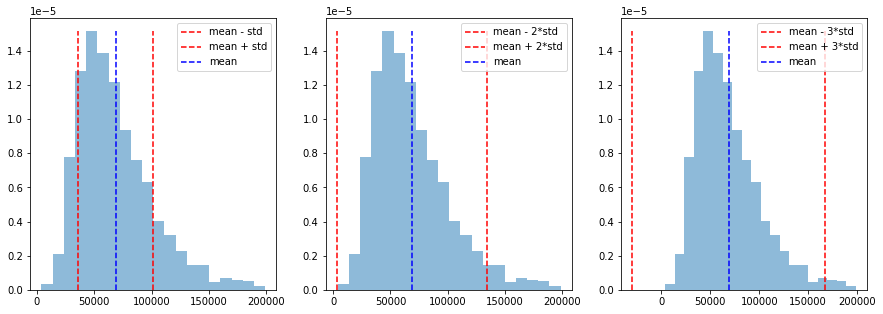

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
std = df.x.std()
n = len(df.x)
n1 = len(df.x[(mean-std<df.x) & (df.x<mean+std)])
n2 = len(df.x[(mean-2*std<df.x) & (df.x<mean+2*std)])
n3 = len(df.x[(mean-3*std<df.x) & (df.x<mean+3*std)])
print(n1/n*100) # 68
print(n2/n*100) # 95
print(n3/n*100) # 99.7

# histogram and box plot 
# long right hand tail
# meadin < mean
# if data is not symmetric, meadian is better to locate the center of data
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,5))
n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
ax0.plot([mean-std,mean-std],[0,n.max()],'--r',label='mean - std') # mean - std
ax0.plot([mean+std,mean+std],[0,n.max()],'--r',label='mean + std') # mean + std
n, *_ = ax1.hist(df.x,bins=20,density=True,alpha=0.5)
ax1.plot([mean-2*std,mean-2*std],[0,n.max()],'--r',label='mean - 2*std') # mean - 2*std
ax1.plot([mean+2*std,mean+2*std],[0,n.max()],'--r',label='mean + 2*std') # mean + 2*std
n, *_ = ax2.hist(df.x,bins=20,density=True,alpha=0.5)
ax2.plot([mean-3*std,mean-3*std],[0,n.max()],'--r',label='mean - 3*std') # mean - 3*std
ax2.plot([mean+3*std,mean+3*std],[0,n.max()],'--r',label='mean + 3*std') # mean + 3*std
for ax in (ax0, ax1, ax2):
    ax.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
    ax.legend(loc='upper right')
plt.show()

###### normal approximation

male height

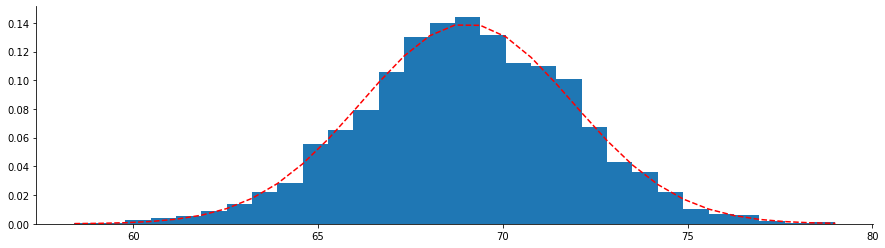

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# histogram and normal approximation    
fig, ax = plt.subplots(figsize=(15,4))
_, bins, _ = ax.hist(df.Height,bins=30,density=True)
pdf = stats.norm(loc=mean_height,scale=std_height).pdf(bins)
ax.plot(bins,pdf,'--r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Plot the histogram and normal approximation of female height.

male weight

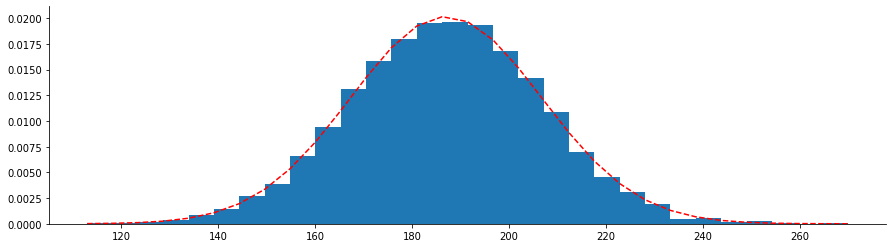

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# histogram and normal approximation   
fig, ax = plt.subplots(figsize=(15,4))
_, bins, _ = ax.hist(df.Weight,bins=30,density=True)
pdf = stats.norm(loc=mean_weight,scale=std_weight).pdf(bins)
ax.plot(bins,pdf,'--r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Plot the histogram and normal approximation of female weight.

loans_income

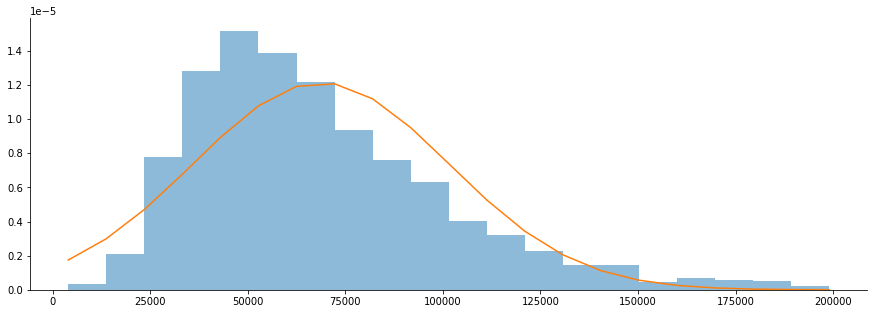

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
std = df.x.std()

# histogram and normal approximation
fig, ax = plt.subplots(figsize=(15,5))
_, bins, _ = ax.hist(df.x,bins=20,density=True,alpha=0.5)
pdf = stats.norm(loc=mean,scale=std).pdf(bins)
ax.plot(bins,pdf)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Discuss why the normal approximation of loan income is not good.

###### area under standard normal curve

left area

0.11506967022170822


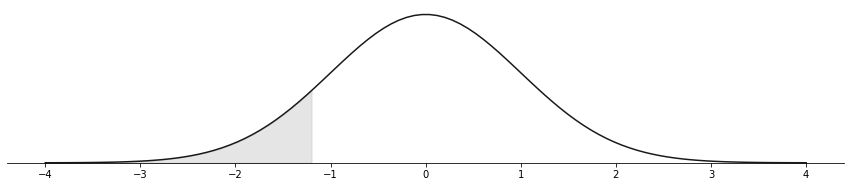

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_left(z,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(-4,z,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z = -1.2
print(stats.norm().cdf(z))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_left(z,ax)
plt.show()

right area

0.11506967022170822


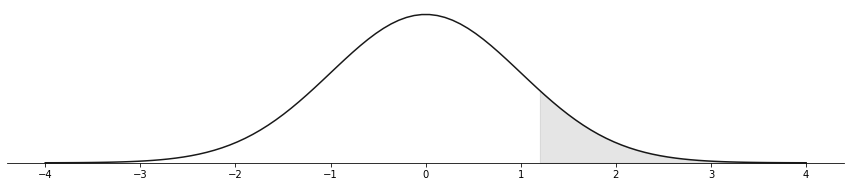

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_right(z,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(z,4,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z = 1.2
print(stats.norm().sf(z))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_right(z,ax)
plt.show()

center area

0.8670659092154752


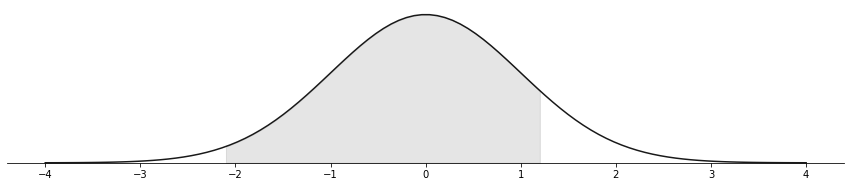

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_center(z1,z2,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(z1,z2,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z1 = -2.1
z2 = 1.2
print(stats.norm().cdf(z2) - stats.norm().cdf(z1))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_center(z1,z2,ax)
plt.show()

# ***PART IV CORRELATION AND REGRESSION***


### ***Chapter 7 Correlation***

###### scatter plot

height and weight

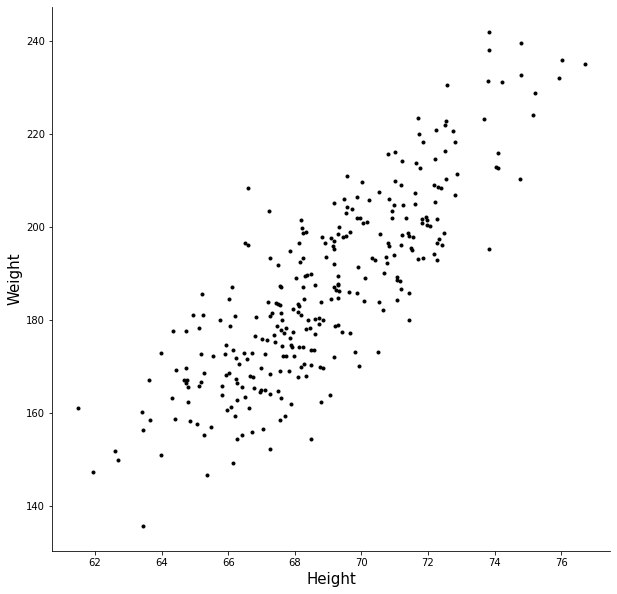

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points     
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

housing

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


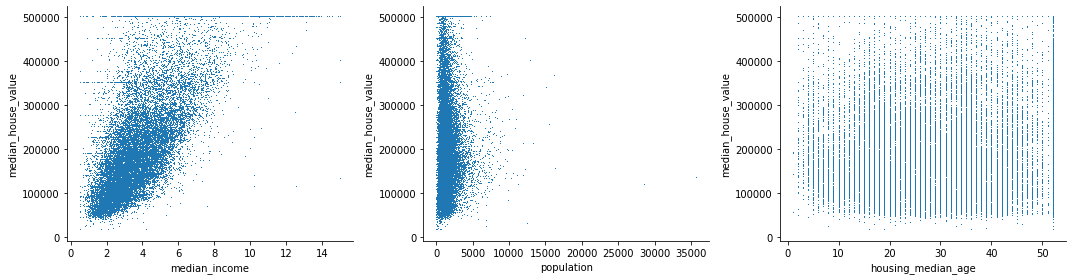

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
df = load_housing_data()
#print(df.head())

# scatter plot
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,4))
ax0.plot(df.median_income,df.median_house_value,',')
ax0.set_xlabel("median_income")
ax1.plot(df.population,df.median_house_value,',')
ax1.set_xlabel("population")
ax2.plot(df.housing_median_age,df.median_house_value,',')
ax2.set_xlabel("housing_median_age")
for ax in (ax0, ax1, ax2):
    ax.set_ylabel("median_house_value")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

demographic scatter plot

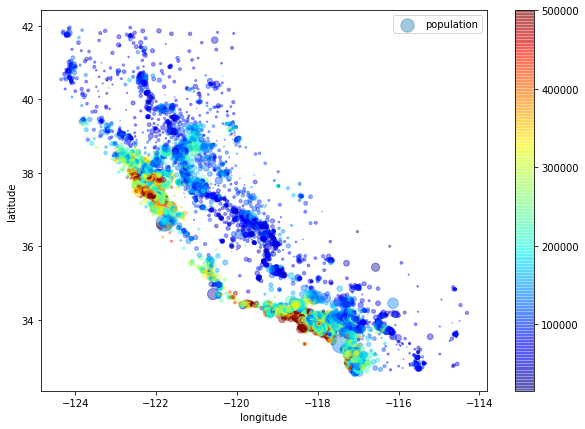

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
df = load_housing_data()

# demographic scatter plot
df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=df["population"]/100, 
    label="population", 
    figsize=(10,7),
    c=df["median_house_value"], 
    cmap=plt.get_cmap("jet"), 
    colorbar=True,
    sharex=False)
plt.legend()
plt.show()

###### pairplot

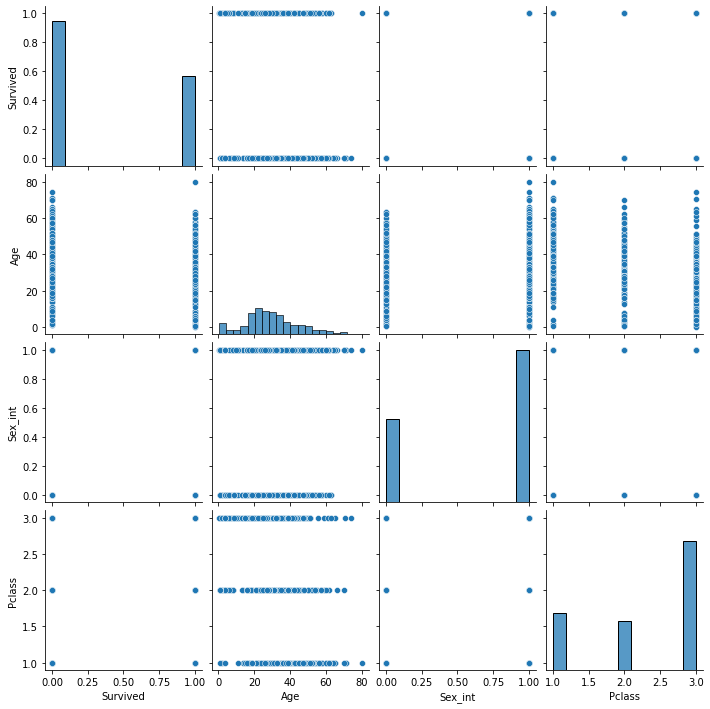

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
# print(df)

# pairplot
df['Sex_int'] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
sns.pairplot( df[["Survived","Age",'Sex_int',"Pclass"]] )
plt.show()

###### mean, std, and corr

mean, std, corr of median_income and median_house_value

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
df = load_housing_data()

mu_x = df.median_income.mean()
mu_y = df.median_house_value.mean()
sigma_x = df.median_income.std()
sigma_y = df.median_house_value.std()
rho = df[["median_income","median_house_value"]].corr().iloc[0,1]
print(mu_x, mu_y)
print(sigma_x, sigma_y)
print(rho)

3.8706710029069766 206855.81690891474
1.8998217179452688 115395.61587441387
0.6880752079585577


###### point of averages

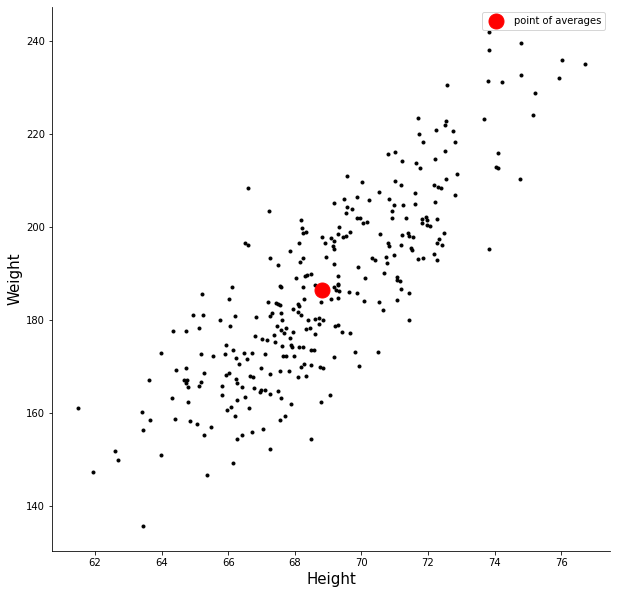

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points     
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### 2 SD band - x

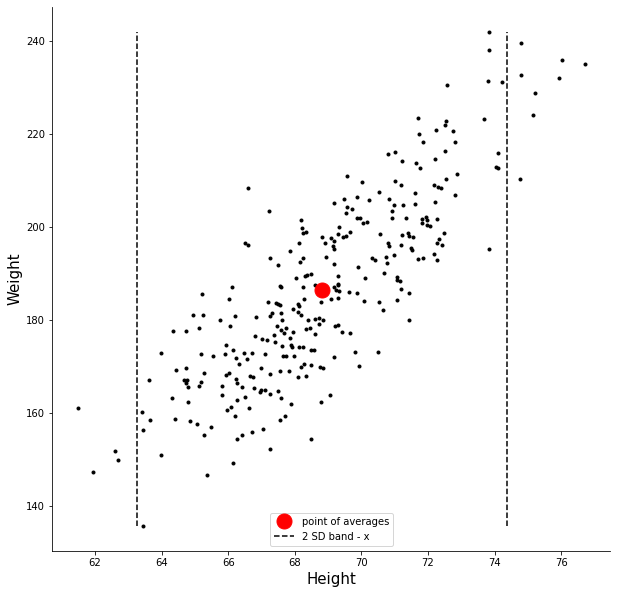

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points
# recall 68–95–99.7 rule     
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
draw_line(
    ax,
    start=[mean_height-2*std_height,df.Weight.min()],
    end=[mean_height-2*std_height,df.Weight.max()],
    linestyle='--',
    color='k',
    label='2 SD band - x'
    )
draw_line(
    ax,
    start=[mean_height+2*std_height,df.Weight.min()],
    end=[mean_height+2*std_height,df.Weight.max()],
    linestyle='--',
    color='k'
    )
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### 2 SD band - y

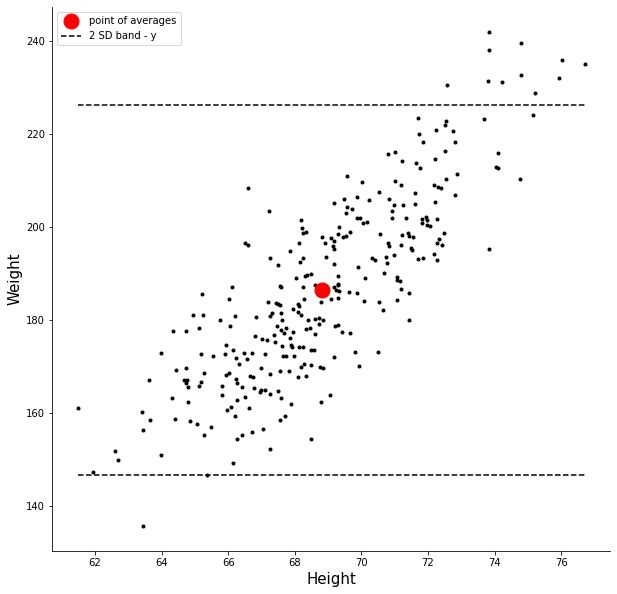

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points  
# recall 68–95–99.7 rule    
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
draw_line(
    ax,
    start=[df.Height.min(),mean_weight-2*std_weight],
    end=[df.Height.max(),mean_weight-2*std_weight],
    linestyle='--',
    color='k',
    label='2 SD band - y'
    )
draw_line(
    ax,
    start=[df.Height.min(),mean_weight+2*std_weight],
    end=[df.Height.max(),mean_weight+2*std_weight],
    linestyle='--',
    color='k'
    )
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### SD line - positive SD line

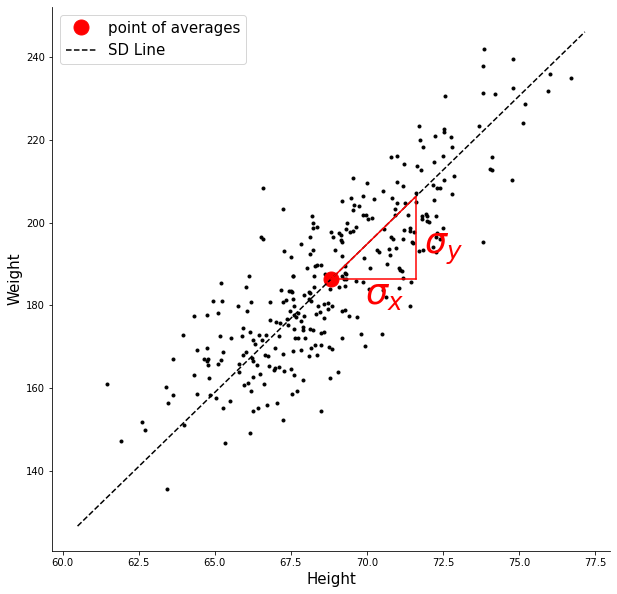

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# plot point of averages
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight-3*std_weight],
    end=[mean_height+3*std_height,mean_weight+3*std_weight],
    linestyle="--",
    label="SD Line"
    )

# draw line from center to center+(std_height,0)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight],
    linestyle="-",
    color='r'
    )

# draw line from center+(std_height,0) to center+(std_height,std_weight)
draw_line(
    ax,
    start=[mean_height+std_height,mean_weight],
    end=[mean_height+std_height,mean_weight+std_weight],
    linestyle="-",
    color='r'
    )

# draw line from center to center+(std_height,std_weight)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight+std_weight],
    linestyle="-",
    color='r'
    )

# annotate text $\sigma_x$
annotate_text(
    ax,
    "$\sigma_x$",
    [mean_height+0.4*std_height,mean_weight-0.3*std_weight]
    )

# annotate text $\sigma_y$
annotate_text(
    ax,
    "$\sigma_y$",
    [mean_height+1.1*std_height,mean_weight+0.3*std_weight]
    )

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###### SD line - negative SD line

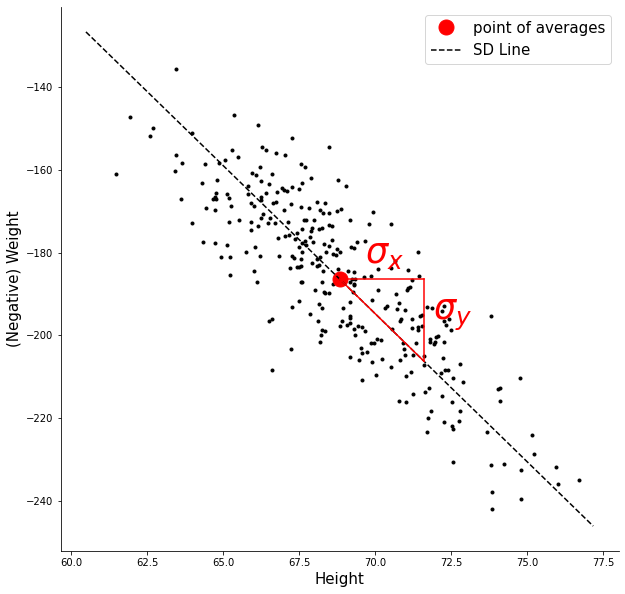

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]
df.Weight = - df.Weight

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# plot point of averages
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight+3*std_weight],
    end=[mean_height+3*std_height,mean_weight-3*std_weight],
    linestyle="--",
    label="SD Line"
    )

# draw line from center to center+(std_height,0)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight],
    linestyle="-",
    color='r'
    )

# draw line from center+(std_height,0) to center+(std_height,-std_weight)
draw_line(
    ax,
    start=[mean_height+std_height,mean_weight],
    end=[mean_height+std_height,mean_weight-std_weight],
    linestyle="-",
    color='r'
    )

# draw line from center to center+(std_height,-std_weight)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight-std_weight],
    linestyle="-",
    color='r'
    )

# annotate text $\sigma_x$
annotate_text(
    ax,
    "$\sigma_x$",
    [mean_height+0.3*std_height,mean_weight+0.2*std_weight]
    )

# annotate text $\sigma_y$
annotate_text(
    ax,
    "$\sigma_y$",
    [mean_height+1.1*std_height,mean_weight-0.5*std_weight]
    )

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('(Negative) Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###### positive and negative correlations

positive correlations

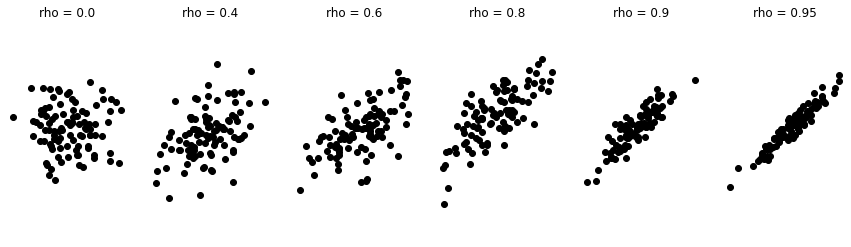

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

samples = lambda mu_1, mu_2, sigma_1, sigma_2, rho, n: stats.multivariate_normal(
    [mu_1, mu_2],
    [[sigma_1, rho*sigma_1*sigma_2],[rho*sigma_1*sigma_2, sigma_2]]
    ).rvs(size=n)

fig, axes = plt.subplots(1,6,figsize=(15,4)) 

for ax, rho in zip(axes,(0.00,0.40,0.60,0.80,0.90,0.95)):
    xy = samples(mu_1=0, mu_2=0, sigma_1=1, sigma_2=1, rho=rho, n=100) # (2,100)
    ax.plot(xy[:,0],xy[:,1],'ok')
    ax.set_title('rho = {}'.format(rho))
    ax.axis('off')
    ax.axis('equal')
    for location in ('left','right','top','bottom'):
        ax.spines[location].set_visible(False)

plt.show()

negative correlations

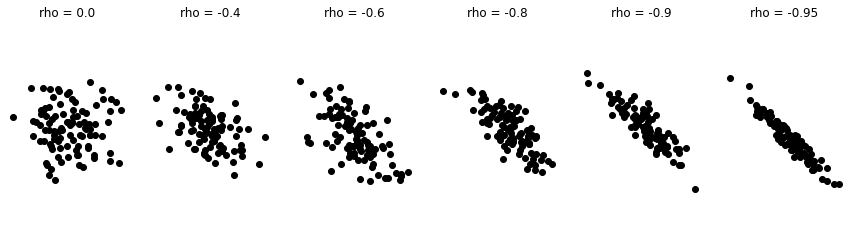

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

samples = lambda mu_1, mu_2, sigma_1, sigma_2, rho, n: stats.multivariate_normal(
    [mu_1, mu_2],
    [[sigma_1, rho*sigma_1*sigma_2],[rho*sigma_1*sigma_2, sigma_2]]
    ).rvs(size=n)

fig, axes = plt.subplots(1,6,figsize=(15,4)) 

for ax, rho in zip(axes,(0.00,-0.40,-0.60,-0.80,-0.90,-0.95)):
    xy = samples(mu_1=0, mu_2=0, sigma_1=1, sigma_2=1, rho=rho, n=100) # (2,100)
    ax.plot(xy[:,0],xy[:,1],'ok')
    ax.set_title('rho = {}'.format(rho))
    ax.axis('off')
    ax.axis('equal')
    for location in ('left','right','top','bottom'):
        ax.spines[location].set_visible(False)

plt.show()

###### correlation

definition and estimation of correlation

$$
\rho=\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$
where
$$\begin{array}{lll}
\mathbb{E}X&\approx&\bar{X}=\displaystyle\frac{\sum_{i=1}^nX_i}{n}\\
\mathbb{E}Y&\approx&\bar{Y}=\displaystyle\frac{\sum_{i=1}^nY_i}{n}\\
Var(X)&\approx&S_X^2=\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}\\
Var(Y)&\approx&S_Y^2=\displaystyle\frac{\sum_{i=1}^n\left(Y_i-\bar{Y}\right)^2}{n-1}\\
Cov(X,Y)&\approx&S_{X,Y}=\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)\left(Y_i-\bar{Y}\right)}{n-1}\\
\end{array}$$

properties of correlation

$$\begin{array}{lll}
(1)&&\rho_{Y,X}=\rho_{X,Y}\\
(2)&&\rho_{X+a,Y}=\rho_{X,Y}\\
&&\rho_{X,Y+a}=\rho_{X,Y}\\
(3)&&\rho_{aX,Y}=\rho_{X,Y}\quad\text{for $a>0$}\\
&&\rho_{X,aY}=\rho_{X,Y}\quad\text{for $a>0$}\\
\end{array}$$

###### ecological correlations tend to overstate the strength of an association



<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/Ecological1.png">

<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/Ecological2.png">

Sorce [Ecological Studies (Correlational Studies)](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/PH717-Module1B-DescriptiveStudies_and_Statistics6.html)

###### correlation measures linear association, not association in general

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/600px-Anscombe%27s_quartet_3.svg.png">

Sorce [Correlations and non-linear relations](https://en.wikiversity.org/wiki/Survey_research_and_design_in_psychology/Tutorials/Correlation/Correlations_and_non-linear_relations)



###### correlation is not causation

<img src="https://miro.medium.com/max/1400/1*8j7U89RK1SgopIGET0mSFA.webp">

Source : [Correlation is not causation](https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53)

### ***Chapter 8 Regression***

###### linear regression line

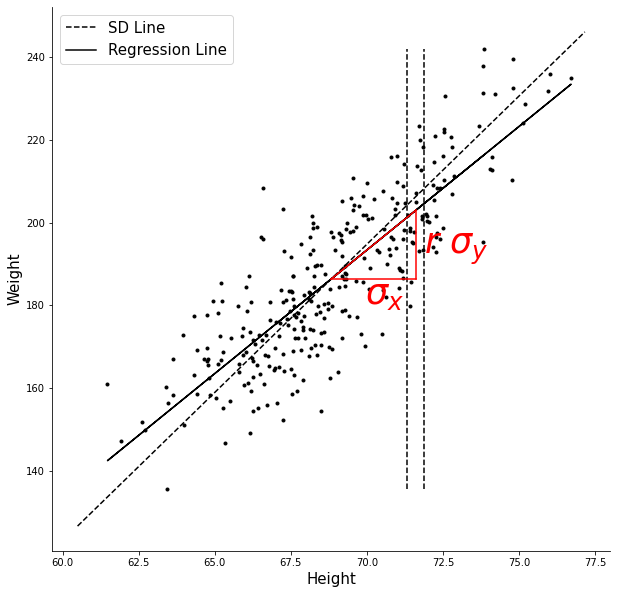

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def compute_regression_line_prediction(x,mean_x,mean_y,std_x,std_y,r):
    x_standardized = ( x - mean_x ) / std_x
    y_pred_standardized = r * x_standardized
    y_pred = y_pred_standardized * std_y + mean_y
    return y_pred 

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})

# compute y_pred using linear regression
x = np.array( df.Height ) 
y_pred = compute_regression_line_prediction(
    x,
    mean_height,
    mean_weight,
    std_height,
    std_weight,
    r
    )      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight-3*std_weight],
    end=[mean_height+3*std_height,mean_weight+3*std_weight],
    linestyle="--",
    label="SD Line"
    )

# draw vertical line at mean_height + 0.9 * std_height
draw_line(
    ax,
    start=[mean_height+0.9*std_height,df.Weight.min()],
    end=[mean_height+0.9*std_height,df.Weight.max()],
    linestyle="--"
    )

# draw vertical line at mean_height + 1.1 * std_height
draw_line(
    ax,
    start=[mean_height+1.1*std_height,df.Weight.min()],
    end=[mean_height+1.1*std_height,df.Weight.max()],
    linestyle="--"
    )

# draw Regression Line
ax.plot(x,y_pred,'k',label="Regression Line")

# draw line from center to center+(std_height,0)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight],
    linestyle="-",
    color='r'
    )

# draw line from center+(std_height,0) to center+(std_height,r*std_weight)
draw_line(
    ax,
    start=[mean_height+std_height,mean_weight],
    end=[mean_height+std_height,mean_weight+r*std_weight],
    linestyle="-",
    color='r'
    )

# draw line from center to center+(std_height,r*std_weight)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight+r*std_weight],
    linestyle="-",
    color='r'
    )

# annotate text $\sigma_x$
annotate_text(
    ax,
    "$\sigma_x$",
    [mean_height+0.4*std_height,mean_weight-0.3*std_weight]
    )

# annotate text $r\ \sigma_y$
annotate_text(
    ax,
    "$r\ \sigma_y$",
    [mean_height+1.1*std_height,mean_weight+0.3*std_weight]
    )

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. In a particular class, midterm scores average out to 60 with an SD of 15, 
whereas the final average is 90 with an SD of 20. 
The correlation between the two exam scores is about 0.60. 
Estimate the average final score for the students whose midterm scores were 
$$
\text{(a) 75}\quad
\text{(b) 30}\quad
\text{(c) 60}
$$

###### two linear regression lines

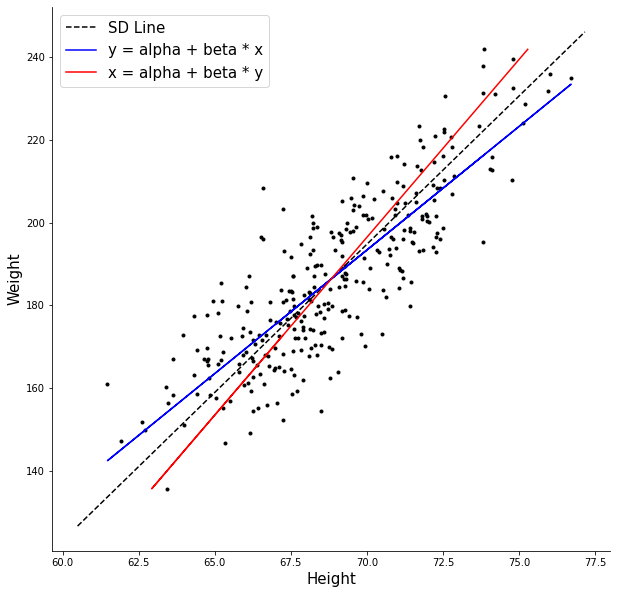

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def compute_regression_line_prediction(x,mean_x,mean_y,std_x,std_y,r):
    x_standardized = ( x - mean_x ) / std_x
    y_pred_standardized = r * x_standardized
    y_pred = y_pred_standardized * std_y + mean_y
    return y_pred 

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})

# compute y_pred using linear regression
x = np.array( df.Height ) 
y_pred = compute_regression_line_prediction(
    x,
    mean_height,
    mean_weight,
    std_height,
    std_weight,
    r
    ) 

# compute x_pred using linear regression
y = np.array( df.Weight ) 
x_pred = compute_regression_line_prediction(
    y,
    mean_weight,
    mean_height,
    std_weight,
    std_height,    
    r
    )      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight-3*std_weight],
    end=[mean_height+3*std_height,mean_weight+3*std_weight],
    linestyle="--",
    color="k",
    label="SD Line"
    )

# draw Regression Line
ax.plot(x,y_pred,'-b',label="y = alpha + beta * x")
ax.plot(x_pred,y,'-r',label="x = alpha + beta * y")

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###### when we use linear regression

model equation



$$\displaystyle
y_i=\alpha+\beta x_i + \varepsilon_i
$$

where

$$\displaystyle
\varepsilon_i\ \text{iid}\ N(0,\sigma^2)
$$

residual plot

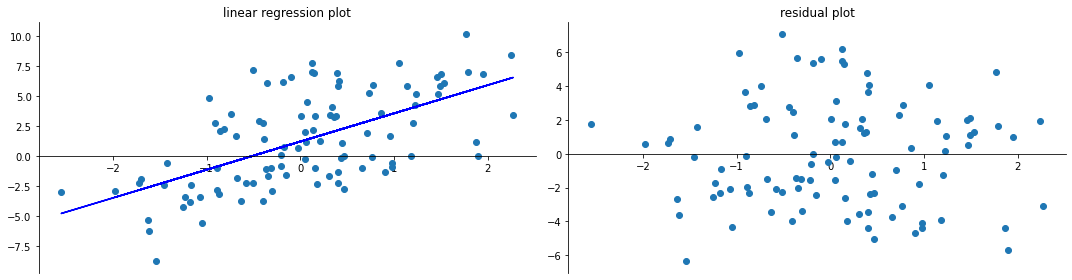

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,4))
ax0.plot(x,y,'o')
ax0.plot(x,y_hat,'-b')
ax0.set_title('linear regression plot')
ax1.plot(x,y-y_hat,'o')
ax1.set_title('residual plot')
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
plt.tight_layout()
plt.show()

when we use linear regression

$$
\begin{array}{lcc}
&\text{linear regression plot}&\text{residual plot}\\\hline
\text{linear relation}&\text{no non-linear relation}&\text{no relation}\\
\sigma(x)&\text{independent to $x$}&\text{independent to $x$}\\
\end{array}
$$

###### linear Regression - estimation of $\sigma^2$

$$\displaystyle
s^2
=\hat{\sigma}^2 
=\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n-2}
=\frac{\sum_{i=1}^n(y_i-(\hat{\alpha}+\hat{\beta} x_i))^2}{n-2}
$$

In [ ]:
import numpy as np; np.random.seed(0)

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)
print("sigma square : {}".format( sigma**2 ))
print("s square     : {}".format( s_square ))

sigma square : 9
s square     : 9.70872110991394


###### linear regression - method of least squares

$$\begin{array}{lll}
\displaystyle l=\frac{1}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)^2
\end{array}$$

Minimize $l$ using gradient descent

$$
\theta \leftarrow \theta - \lambda \nabla l
$$

Set gradient zero

$$\begin{array}{lll}
\displaystyle \frac{\partial l}{\partial\alpha}=\frac{2}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)=0
&\Rightarrow&\displaystyle
2\alpha+2\beta\bar{x}-2\bar{y}=0\\
\displaystyle \frac{\partial l}{\partial\beta}=\frac{2}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)x_i=0
&\Rightarrow&\displaystyle
2\alpha\bar{x}+2\beta\bar{x^2}-2\bar{xy}=0
\end{array}$$

Solution

$$\begin{array}{lll}
\displaystyle 
\beta
&=&\displaystyle 
\frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}
=\frac{Cov(X,Y)}{Var(X)}
=\frac{\rho\sqrt{Var(X)}\sqrt{Var(Y)}}{Var(X)}
=\frac{\rho\sqrt{Var(Y)}}{\sqrt{Var(X)}}
=\rho\frac{\sigma_y}{\sigma_x}\\
\alpha&=&\displaystyle
-\rho\frac{\sigma_y}{\sigma_x}\bar{x}+\bar{y}
\end{array}$$

The linear regression line passes the point of averages $(\bar{x},\bar{y})$.
Furthermore, the slope is $\rho$ in the standarized unit, or $\rho\sigma_y/\sigma_x$ in the original unit.

$$\begin{array}{lll}
y
&=&\displaystyle
\alpha+\beta x\\
&=&\displaystyle
-\rho\frac{\sigma_y}{\sigma_x}\bar{x}+\bar{y}+\rho\frac{\sigma_y}{\sigma_x} x\\
&=&\displaystyle
\rho\frac{\sigma_y}{\sigma_x}(x-\bar{x})+\bar{y}\\
\end{array}$$

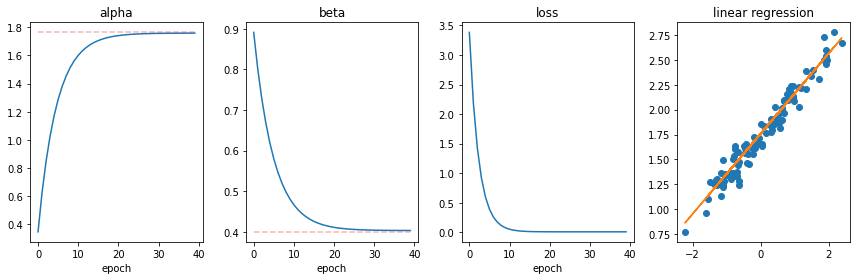

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epoch = int(4e1)
lr = 1e-1

def generate_y_data(coeff, x, error):
    return coeff[0,0] + np.sum(coeff[1:].reshape((1,-1)) * x, axis=1).reshape((-1,1)) + error

def load_data(n_train=100, n_test=100, feature_dim=1, coeff=None, seed=None, error_std=0.1):
    
    if seed is not None:
        np.random.seed(seed)
    
    if coeff is None:
        coeff = np.random.normal(0., 1., (feature_dim+1, 1)) # (2,1)
    
    x_train = np.random.normal(0., 1., (n_train, feature_dim)) # (100, 1)
    x_test = np.random.normal(0., 1., (n_test, feature_dim)) # (100, 1)
    
    error_train = error_std * np.random.normal(0., 1., (n_train, 1)) # (100, 1)
    error_test = error_std * np.random.normal(0., 1., (n_test, 1)) # (100, 1)
    
    y_train = generate_y_data(coeff, x_train, error_train)   
    y_test = generate_y_data(coeff, x_test, error_test)
        
    return x_train, y_train, x_test, y_test, coeff


x_train, y_train, x_test, y_test, coeff = load_data(feature_dim=1, seed=0)
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)
#print(coeff)

alpha = 0.
beta = 1.
alpha_trace = []
beta_trace = []
loss_trace = []

n = x_train.shape[0]
for i in range(epoch):
    y_pred = alpha + beta * x_train
    grad_alpha = (2/n)*np.sum(y_pred-y_train)
    grad_beta = (2/n)*np.sum((y_pred-y_train)*x_train) # (100,1)*(100,1)
    alpha -= lr * grad_alpha
    beta -= lr * grad_beta
    loss = (1/n)*np.sum((y_pred-y_train)**2)
    alpha_trace.append(alpha)
    beta_trace.append(beta)
    loss_trace.append(loss)

y_test_pred = alpha + beta * x_test

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(12,4))
ax0.plot(alpha_trace)
ax0.plot(coeff[0,0]*np.ones_like(np.array(alpha_trace)),'--r',alpha=0.3)
ax0.set_xlabel('epoch')
ax0.set_title('alpha')
ax1.plot(beta_trace)
ax1.plot(coeff[1,0]*np.ones_like(np.array(alpha_trace)),'--r',alpha=0.3)
ax1.set_xlabel('epoch')
ax1.set_title('beta')
ax2.plot(loss_trace)
ax2.set_xlabel('epoch')
ax2.set_title('loss')
ax3.plot(x_test.reshape((-1,)), y_test.reshape((-1,)), 'o')
ax3.plot(x_test.reshape((-1,)), y_test_pred.reshape((-1,)))
ax3.set_title('linear regression')
plt.tight_layout()
plt.show()

###### linear regression - sklearn.linear_model.LinearRegression

(140, 3)
(140, 1)
(60, 3)
(60, 1)

[6.8814206]
[[0.01832572 0.02292052 0.00112136]]

0.9651549678209385
0.9739145444261225



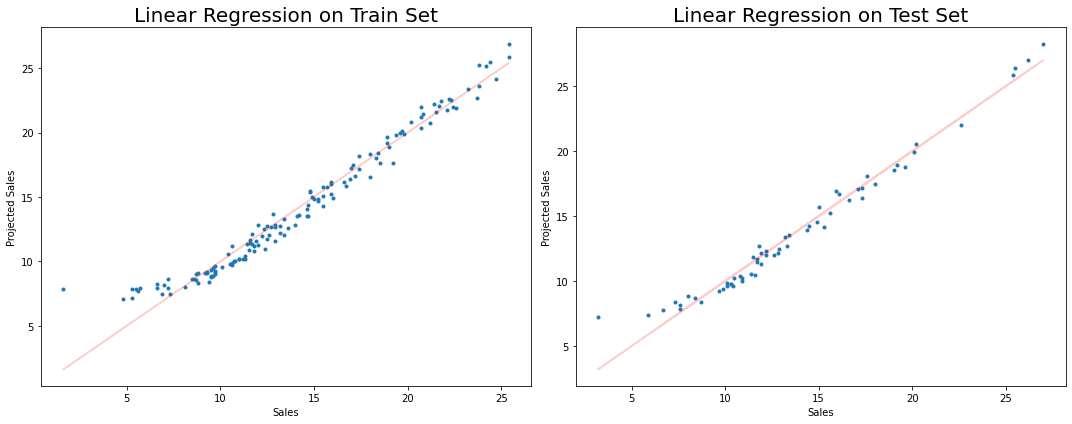

In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression


def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test


def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg = df.iloc[:num_data_train] 
    
    # result = sm.ols('Sales ~ TV + Radio + Newspaper', dg).fit()
    # print("result = sm.ols('Sales ~ TV + Radio + Newspaper', dg).fit()")
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    # result = sm.ols('Sales ~ TV + Radio', dg).fit()
    # print("result = sm.ols('Sales ~ TV + Radio', dg).fit()")
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    # result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg).fit()
    # print("result = sm.ols('Sales ~ TV + Radio', dg).fit()")
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    df['TV:Radio'] = df['TV'] * df['Radio']
    x_train, y_train, x_test, y_test = train_test_split(df[['TV','Radio','TV:Radio','Sales']]) 
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape, end="\n\n")
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(model.intercept_)
    print(model.coef_, end="\n\n")
    
    print(model.score(x_train, y_train)) # R^2
    print(model.score(x_test, y_test), end="\n\n") # R^2
    
    # print(f"{metrics.mean_absolute_error(y_train, y_train_pred) = }")
    # print(f"{metrics.mean_absolute_error(y_test, y_test_pred) = }", end="\n\n")
    
    # print(f"{metrics.mean_squared_error(y_train, y_train_pred) = }")
    # print(f"{metrics.mean_squared_error(y_test, y_test_pred) = }", end="\n\n")
    
    # print(f"{np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)) = }")
    # print(f"{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) = }", end="\n\n")
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,6))
    
    ax0.set_title("Linear Regression on Train Set", fontsize=20)
    ax0.plot(y_train.reshape((-1,)), y_train_pred.reshape((-1,)), '.')
    ax0.plot(y_train.reshape((-1,)), y_train.reshape((-1,)), '-r', alpha=0.2)
    
    ax1.set_title("Linear Regression on Test Set", fontsize=20)
    ax1.plot(y_test.reshape((-1,)), y_test_pred.reshape((-1,)), '.')
    ax1.plot(y_test.reshape((-1,)), y_test.reshape((-1,)), '-r', alpha=0.2)
    
    for ax in (ax0, ax1): 
        ax.set_xlabel('Sales')
        ax.set_ylabel('Projected Sales')
            
    plt.tight_layout()
    plt.show()
             
    
if __name__ == "__main__":
    main()

Exercise 1. Use housing data and do the following

(a) Plot the regression line using $x = \text{df.median_income}$ and $y = \text{df.median_house_value}$.

(b) Compute regression prediction of median_house_value 
when median_income is 8.

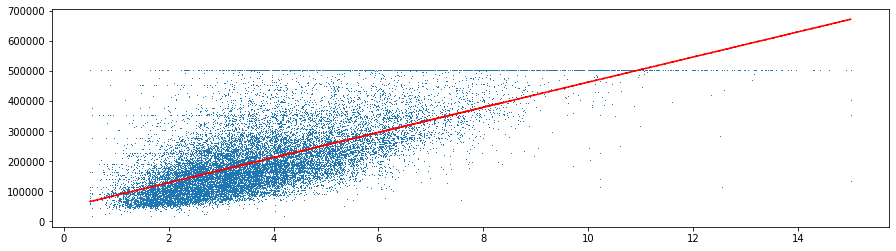

379436.3703184381


In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import os
import pandas as pd
import tarfile
import urllib
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# (a)
df = load_housing_data()
x = np.array(df.median_income).reshape((-1,1)) # (100,) ---> (100,1)
y = np.array(df.median_house_value)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,',')
ax.plot(x,y_pred,'--r')
plt.show()

# (b)
print(model.predict([[8]])[0])

###### $R^2$

$SS_{\text{Total}}$ is all the variation of $y_i$.
Decompose $SS_{\text{Total}}$ into $SS_{\text{Treatment}}$ and $SS_{\text{Error}}$. Note no crossing terms!

$$\begin{array}{lll}
SS_{\text{Total}}
&=&\displaystyle \sum _{i}\left(y_{i}-{\bar {y}}\right)^{2}\\
&=&\displaystyle \sum _{i}\left(\left(y_{i}-\hat{y_{i}}\right)+\left(\hat{y_{i}}-{\bar {y}}\right)\right)^{2}\\
&=&\displaystyle \sum _{i}\left(y_{i}-\hat{y_{i}}\right)^{2}+\sum _{i}\left(\hat{y_{i}}-{\bar {y}}\right)^{2}\\
&:=&\displaystyle SS_{\text{Error}}+SS_{\text{Treatment}}\\
\end{array}$$

$SS_{\text{Treatment}}$ is all the variation of $\hat{y}_i$,
that can be explained by the linear regression among all the variation of $y_i$.
$SS_{\text{Treatment}}$ can be expressed in terms of the $x$ variation.

$$\begin{array}{lll}
SS_{\text{Treatment}}
&=&\displaystyle \sum _{i}\left(\hat{y_{i}}-{\bar {y}}\right)^{2}\\
&=&\displaystyle \sum _{i}\left(\left(\alpha+\beta x_i\right)-\left(\alpha+\beta \bar{x}\right)\right)^{2}\\
&=&\displaystyle \beta^2\sum _{i}\left(x_i-\bar{x}\right)^{2}\\
&=&\displaystyle n\sigma_x^2\beta^2\\
&=&\displaystyle n\sigma_x^2\left(\rho\frac{\sigma_y}{\sigma_x}\right)^2\\
&=&\displaystyle n\sigma_y^2\rho^2\\
\end{array}$$

$R^2$ is the ratio $SS_{\text{Treatment}}/SS_{\text{Total}}$ that can be explained by the linear regression among all the variation of $y$.

$$
\displaystyle 
R^2=\frac{SS_{\text{Treatment}}}{SS_{\text{Total}}}
=\frac{n\sigma_y^2\rho^2}{n\sigma_y^2}
=\rho^2
$$

#***PART V TESTS OF SIGNIFICANCE***

### **Chapter 9 Sampling Distribution**

###### Sampling distribution of $\bar{X}$

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\Rightarrow&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)
\end{array}$$

Sampling distribution of $\bar{X}$ - simulation

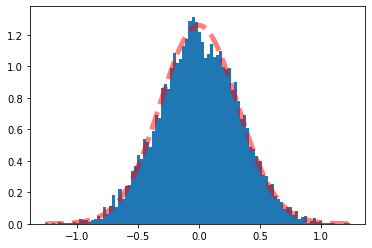

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy import stats
n = 10_000
k = 10
population = [np.random.randn() for _ in range(n)]
x_bar_samples = [np.array(random.sample(population, k)).mean() for _ in range(n)]
_, bins, _ = plt.hist(x_bar_samples,density=True,bins=100)
mu = 0
sigma = 1 / np.sqrt(k)
pdf = stats.norm(loc=mu,scale=sigma).pdf(bins)
plt.plot(bins,pdf,'--r',alpha=0.5,lw=5)
plt.show()

sampling distribution of $\bar{X}$ - real data (one sample size)

        x
0   67000
1   52000
2  100000
3   78762
4   37041


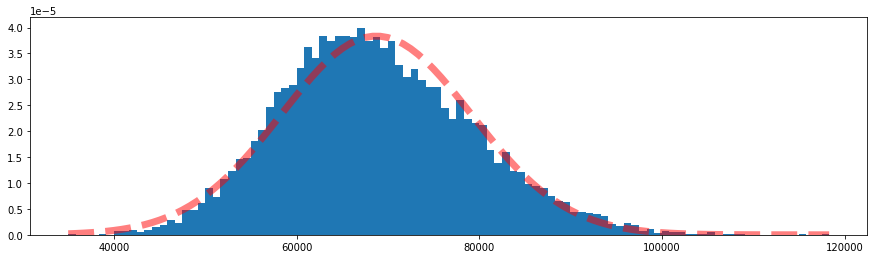

In [ ]:
# Generate 10_000 x_bar of 10 samples from loans_income and 
# plot histogram of these 10_000 data with density=True
# draw the normal pdf of same mean and std of these 10_000 data on the same ax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# data loading
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
print(df.head())

# generate 10_000 x_bar of 10 samples from loans_income
n = 10_000
x_bar = np.array([df.sample(10).mean()[0] for _ in range(n)])
mu = x_bar.mean()
sigma = x_bar.std()

# plot histogram of these 10_000 data with density=True
# draw the normal pdf of same mean and std of these 10_000 data on the same ax
fig, ax = plt.subplots(figsize=(15,4))
_, bins, _ = ax.hist(x_bar, bins=100, density=True)
pdf = stats.norm(loc=mu,scale=sigma).pdf(bins)
ax.plot(bins,pdf,'--r',alpha=0.5,lw=7)
plt.show()

sampling distribution of $\bar{X}$ - real data (many sample sizes)

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\Rightarrow&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)
\end{array}$$

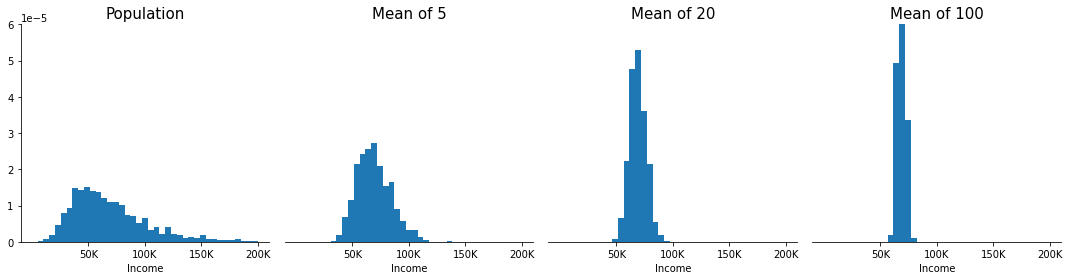

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    population = pd.read_csv(url, squeeze=True) # pandas series Name: x, Length: 50000, dtype: int64
    sampling_mean_5 = [population.sample(5).mean() for _ in range(1000)]
    sampling_mean_20 = [population.sample(20).mean() for _ in range(1000)]
    sampling_mean_100 = [population.sample(100).mean() for _ in range(1000)]
    
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    
    bins = np.linspace(0, 200000, 40)
    ax0.hist(population, bins=bins, density=True)
    ax1.hist(sampling_mean_5, bins=bins, density=True)
    ax2.hist(sampling_mean_20, bins=bins, density=True)
    ax3.hist(sampling_mean_100, bins=bins, density=True)
    
    for ax, title in zip((ax0,ax1,ax2,ax3),('Population','Mean of 5','Mean of 20','Mean of 100')):
        ax.set_title(title, fontsize=15)
        ax.set_ylim(0,6e-5)
        ax.set_xlabel('Income')
        ax.set_xticks( (50_000,100_000,150_000,200_000) )
        ax.set_xticklabels( ("50K","100K","150K","200K") )
        for location in ('right','top'):
            ax.spines[location].set_visible(False)
        if ax in (ax1, ax2, ax3):
            ax.spines['left'].set_visible(False)
            ax.set_yticks( () )
    
    plt.tight_layout()
    os.makedirs('img', exist_ok=True)
    plt.savefig("img/Sampling Distribution of X_bar.png", dpi=1000, facecolor="white")
    plt.show()

    
if __name__ == "__main__":
    main()

###### Sampling distribution of $S^2$

$$
S^2=\frac{\sum_{k=1}^n\left(X_k-\bar{X}\right)^2}{n-1}
\quad\Rightarrow\quad
\frac{(n-1)S^2}{\sigma^2}=\sum_{k=1}^n\left(\frac{X_k-\bar{X}}{\sigma}\right)^2\sim\chi^2_{n-1}
$$

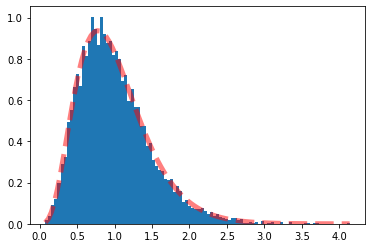

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy import stats
n = 10_000
k = 10
population = [np.random.randn() for _ in range(n)]
S_square_samples = [np.array(random.sample(population, k)).var(ddof=1) for _ in range(n)]
_, bins, _ = plt.hist(S_square_samples,density=True,bins=100)
df = k - 1
c = 1 / df
pdf = stats.chi2(df).pdf(bins/c) * (1/c) 
plt.plot(bins,pdf,'--r',alpha=0.5,lw=5)
plt.show()

###### t samples 

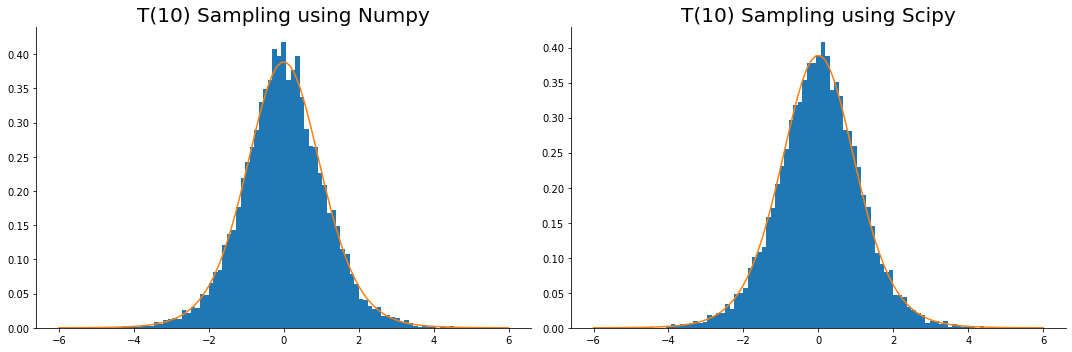

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import special
from scipy import stats


def main():
    sample_size = 10_000
    mu = 0
    sigma = 10
    df = 10
    df_ = ( df + 1 ) / 2
    const = special.gamma(df_) / ( np.sqrt(np.pi*df) * special.gamma(df/2) )

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title(f"T({df}) Sampling using Numpy", fontsize=20)
    
    x = np.random.standard_t(df, size=(sample_size,))
    x_fig = np.linspace(-6,6,100)
    y_fig = const * ( 1 + x_fig**2 / df )**( - df_ )
    
    ax0.hist(x, density=True, bins=x_fig)
    ax0.plot(x_fig, y_fig)
    
    ax1.set_title(f"T({df}) Sampling using Scipy", fontsize=20)
    
    x = stats.t(df).rvs(size=10_000)
    #x_fig = np.linspace(-6,6,100)
    y_fig = stats.t(df).pdf(x_fig)
    
    ax1.hist(x, density=True, bins=x_fig)
    ax1.plot(x_fig, y_fig)
    
    for ax in (ax0, ax1):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

###### $\chi^2$ samples

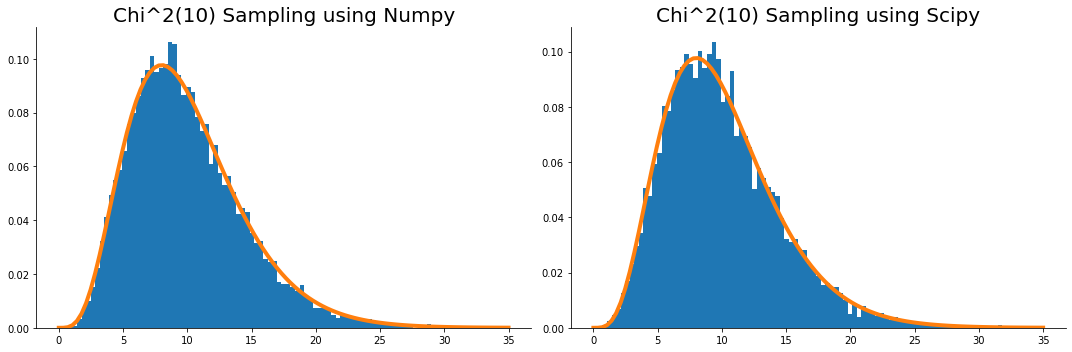

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import special
from scipy import stats


def main():
    sample_size = 10_000
    df = 10
    df_ = df / 2
    const = (1/2)**df_ / special.gamma(df_) 

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title(f"Chi^2({df}) Sampling using Numpy", fontsize=20)
    
    x = np.random.chisquare(df, size=(sample_size,))
    x_fig = np.linspace(0,35,100)
    y_fig = const * x_fig**( df_ - 1 ) * np.exp( - x_fig / 2 )
    
    ax0.hist(x, density=True, bins=x_fig)
    ax0.plot(x_fig, y_fig, linewidth=4)
    
    ax1.set_title(f"Chi^2({df}) Sampling using Scipy", fontsize=20)
    
    x = stats.chi2(df).rvs(size=10_000)
    #x_fig = np.linspace(0,35,100)
    y_fig = stats.chi2(df).pdf(x_fig)
    
    ax1.hist(x, density=True, bins=x_fig)
    ax1.plot(x_fig, y_fig, linewidth=4)
    
    for ax in (ax0, ax1):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

####**Section 10 Standard Deviation vs Standard Error**

Standard deviation: Quantifies the variability of values in a dataset. It assesses how far a data point likely falls from the mean.

$$
\text{SD}=\sqrt{Var(X)}
$$

Standard error: Quantifies the variability between samples drawn from the same population. It assesses how far a sample statistic likely falls from a population parameter.

$$
\text{SE}=\sqrt{Var(\theta(X_1,\cdots,X_n))}
$$

[Difference Between Standard Deviation and Standard Error](https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/)

### **Chapter 10 Confidence Interval**

####**Section 1 Confidence Interval**

#####**Confidence Interval**

<img src="https://media.nngroup.com/media/editor/2021/06/11/ci-width.png">

[Confidence Intervals, Margins of Error, and Confidence Levels in UX](https://www.nngroup.com/articles/confidence-interval/)

#####**Symetric Case**

$$\begin{array}{lll}
\mbox{Confidence_Interval}_\theta 
&=&\hat{\theta}\pm\mbox{Margin_of_Error}_\theta\\
\end{array}$$

#####**Non-Symetric Case**

$$\begin{array}{lll}
\mbox{Confidence_Interval}_\theta 
&=&(\mbox{Left}_\theta, \mbox{Right}_\theta)\\
&=&\mbox{Center}_\theta\pm\frac{\mbox{Right}_\theta-\mbox{Left}_\theta}{2}\\
&=&\mbox{Center}_\theta\pm\mbox{Margin_of_Error}_\theta
\end{array}$$

####**Section 2 $z$ Confidence Interval**

#####**$z$ Confidence Interval**



$$
\begin{array}{ccc}
\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx \frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}} \approx N(0,1)
&\Rightarrow&
\bar{X}\pm z_*\frac{S}{\sqrt{n}}\\
\end{array}
$$

######**Proof**

For large $n$ so that we can use the central limit theorem and the law of large numbers

$$\begin{array}{lll}
\displaystyle
X_k\ \text{(approximately) iid with mean $\mu$, variance $\sigma^2$}
&\Rightarrow&
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}\\
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm z_*\frac{s}{n}
\end{array}$$

#####**Conditions for $z$ Confidence Interval**

- Samples are chosen randomly from the population.

- Sample size is less than 10% of total population so that sampling without replacement can be approximated as sampling with replacement.

- Sample size is large, i.e., $n\ge30$, so that we can use the CLT.


#####**Code - $z$ Confidence Interval**

In [44]:
def main():
    data = np.array([[3, 4, 5, 10, 11, 12]])
    x_bar, margin_of_error = compute_z_confidence_interval(data)
    print(f"{x_bar[0]} \u00B1 {margin_of_error[0]:.2f}")

if __name__ == "__main__":
    main()

7.5 ± 3.15


#####**Code - $z$ Confidence Interval : scipy.stats.norm.interval**

In [46]:
def main():
    data = np.array([3, 4, 5, 10, 11, 12])
    left, right = stats.norm(loc=data.mean(), scale=stats.sem(data)).interval(confidence=0.95)
    x_bar = (left + right) / 2
    margin_of_error = x_bar - left 
    print(f"{x_bar} \u00B1 {margin_of_error:.2f}")

if __name__ == "__main__":
    main()

7.5 ± 3.15


#####**Code - 30 $z$ Confidence Intervals**

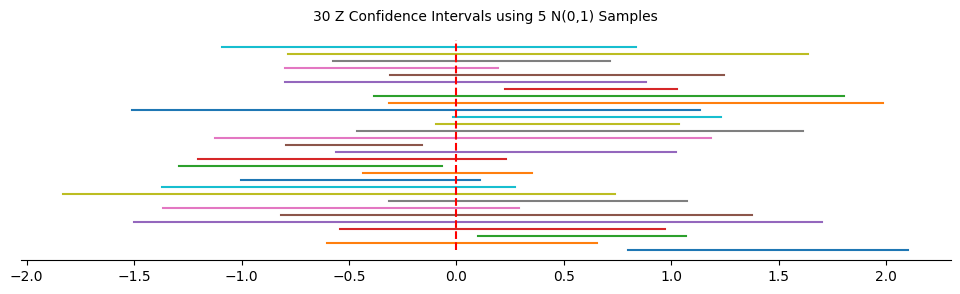

In [20]:
def main():
    seed = 0
    np.random.seed(seed)

    n_simulations = 30
    n_samples = 5
    data = np.random.normal(size=(n_simulations, n_samples)) # (30,5)
    x_bars, margin_of_errors = compute_z_confidence_interval(data) # (30,), (30,)

    fig, ax = plt.subplots(figsize=(12,3))
    for i, (x_bar, margin_of_error) in enumerate(zip(x_bars, margin_of_errors)):
        ax.plot([x_bar-margin_of_error,x_bar+margin_of_error], [i,i])
    ax.plot([0,0],[0,n_simulations],'--r')
    title = f"{n_simulations} Z Confidence Intervals using {n_samples} N(0,1) Samples"
    ax.set_title(title, fontsize=10)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks( () )   
    plt.show()

if __name__ == "__main__":
    main()

#####**Code - Building $z$ Confidence Interval not containing Mean using Real Data**

4 (56454.876509416645, 66270.28349058336)


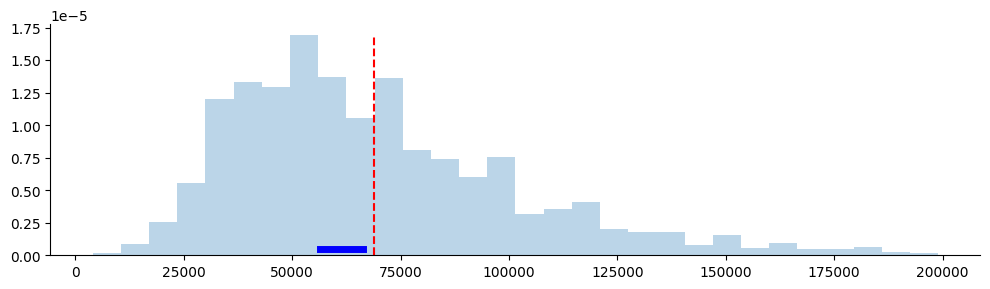

In [36]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    population = df.values.reshape((-1,)) # (50000,)

    seed = 1
    np.random.seed(seed)

    n = 100
    mean_true = 68760.51844
    counter = 0
    while True:
        counter += 1
        data = np.random.choice(population, size=(1,n), replace=False) # (1,100)
        x_bars, margin_of_errors = compute_z_confidence_interval(data) # (1,), (1,)
        left = x_bars[0] - margin_of_errors[0]
        right = x_bars[0] + margin_of_errors[0]
        if (mean_true < left) or (mean_true > right):
            print(counter, (left, right)) 
            break

    fig, ax = plt.subplots(figsize=(12,3))

    # draw the distribution of the original data
    heights, bins, _ = ax.hist(population,bins=30,density=True,alpha=0.3)

    # draw mu
    ax.plot((mean_true,mean_true),(0,heights.max()),'--r')

    # draw confidence interval which does not contain mu
    ax.plot((left,right),(0.05e-5,0.05e-5),'-b',lw=5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

####**Section 3 $t$ Confidence Interval**

#####**$t$ Confidence Interval**

If $X_i$ are iid normal,

$$
\begin{array}{ccc}
\displaystyle
\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}} \sim t_{n-1}
&\Rightarrow&
\bar{X}\pm t_*\frac{S}{\sqrt{n}}\\
\end{array}
$$

#####**Conditions for $t$ Confidence Interval**

- Samples are chosen randomly from the population.

- Sample size is less than 10% of total population so that sampling without replacement can be approximated as sampling with replacement.

- Sample size should be small. Otherwise, we would use the $z$ confidence interval istead,


- Population distribution should be normal.




#####**$z$ or $t$? Which One to use?**

$$\begin{array}{lllll}
\text{sample size : small} < 30
&\Rightarrow&
\text{population distribution : normal}
&\Rightarrow&
\text{use $t$}\\
\text{sample size : large} \ge 30
&\Rightarrow&
\text{}
&\Rightarrow&
\text{use $z$}\\
\end{array}$$

#####**Example - Smallest Sample Size with Given Margin of Error [eng](https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample/estimating-population-mean/v/sample-size-for-a-given-margin-of-error-for-a-mean?modal=1)**


Nadia wants to create a confidence interval to estimate the mean driving range for her company's new electric vehicle. She wants the margin of error to be no more than 10 kilometers at a 90% level of confidence. A pilot study suggests that the driving ranges for this type of vehicle have a standard deviation of 15 kilometers. Which of these is the smallest approximate sample size required to obtain the desired margin of error? 

######**Solution**

In [ ]:
# using t confidence interval
def main():
    confidence_level = 0.90
    alpha = 1 - confidence_level

    margin_of_error_max = 10

    s = 15

    n = 1
    while True:
        n += 1
        t_star = stats.t(df=n-1).ppf( 1 - alpha / 2 )
        margin_of_error = t_star * s / np.sqrt(n) 
        if margin_of_error <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 9


In [ ]:
# using z confidence interval (khanacademy)
def main():
    confidence_level = 0.90
    alpha = 1 - confidence_level
    z_star = stats.norm().ppf( 1 - alpha / 2 )

    margin_of_error_max = 10

    s = 15

    n = 1
    while True:
        n += 1
        #z_star = stats.norm().ppf( 1 - alpha / 2 ) # loop hoisting
        margin_of_error = z_star * s / np.sqrt(n) 
        if margin_of_error <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 7


#####**Example - Caloric Content of Burritos [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-interval-mean/v/calculating-a-one-sample-t-interval-for-a-mean?modal=1)**

A nutritionist wants to estimate the average caloric content of the burritos at a popular restaurant. They obtain a random sample of 14 burritos and measure their caloric content. Their sample data are roughly symmetric with a mean of 700 calories and a standard deviation of 50 calories. Based on this sample, construct a 95% confidence interval for the mean caloric content of these burritos.

######**Solution**

In [63]:
def main():
    confidence_level = 0.95
    alpha = 1 - confidence_level

    x_bar = 700
    s = 50
    n = 14

    t_star = stats.t(df=n-1).ppf( 1 - alpha / 2 )
    margin_of_error = t_star * s / np.sqrt(n) 
    print(f"{x_bar} \u00B1 {margin_of_error:.1f}") 

if __name__ == "__main__":
    main()

700 ± 28.9


#####**Code - $t$ Confidence Interval**

In [55]:
def main():
    data = np.array([[3, 4, 5, 10, 11, 12]])
    x_bar, margin_of_error = compute_t_confidence_interval(data)
    print(f"{x_bar[0]} \u00B1 {margin_of_error[0]}")

if __name__ == "__main__":
    main()

7.5 ± 4.1316322474774


#####**Code - $t$ Confidence Interval : scipy.stats.t.interval**

In [57]:
def main():
    data = np.array([3, 4, 5, 10, 11, 12])
    left, right = stats.t(df=data.shape[0]-1).interval(confidence=0.95, loc=data.mean(), scale=stats.sem(data))
    x_bar = (left + right) / 2
    margin_of_error = x_bar - left 
    print(f"{x_bar} \u00B1 {margin_of_error:.2f}")

if __name__ == "__main__":
    main()

3.3683677525226 11.6316322474774
7.5 ± 4.13


#####**Code - 30 $t$ Confidence Intervals**

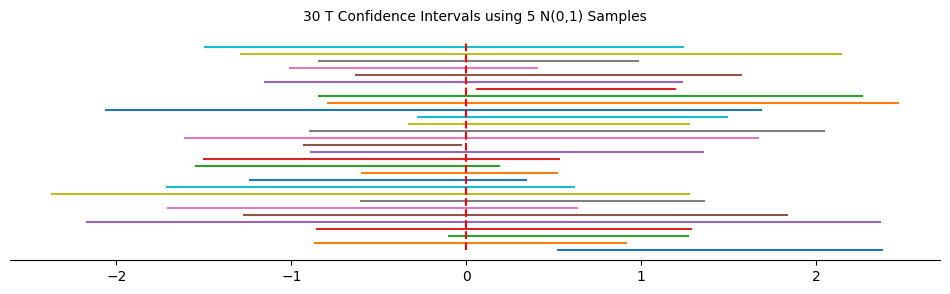

In [40]:
def main():
    seed = 0
    np.random.seed(seed)

    n_simulations = 30
    n_samples = 5
    data = np.random.normal(size=(n_simulations, n_samples)) # (30,5)
    x_bars, margin_of_errors = compute_t_confidence_interval(data) # (30,), (30,)

    fig, ax = plt.subplots(figsize=(12,3))
    for i, (x_bar, margin_of_error) in enumerate(zip(x_bars, margin_of_errors)):
        ax.plot([x_bar-margin_of_error,x_bar+margin_of_error], [i,i])
    ax.plot([0,0],[0,n_simulations],'--r')
    title = f"{n_simulations} T Confidence Intervals using {n_samples} N(0,1) Samples"
    ax.set_title(title, fontsize=10)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks( () )   
    plt.show()

if __name__ == "__main__":
    main()

#####**Code - Building $t$ Confidence Interval not containing Mean using Real Data**

4 (56394.14765338265, 66331.01234661735)


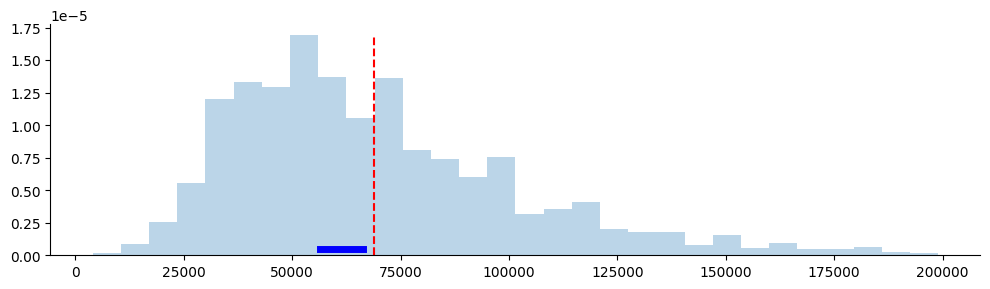

In [41]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    population = df.values.reshape((-1,)) # (50000,)

    seed = 1
    np.random.seed(seed)

    n = 100
    mean_true = 68760.51844
    counter = 0
    while True:
        counter += 1
        data = np.random.choice(population, size=(1,n), replace=False) # (1,100)
        x_bars, margin_of_errors = compute_t_confidence_interval(data) # (1,), (1,)
        left = x_bars[0] - margin_of_errors[0]
        right = x_bars[0] + margin_of_errors[0]
        if (mean_true < left) or (mean_true > right):
            print(counter, (left, right)) 
            break

    fig, ax = plt.subplots(figsize=(12,3))

    # draw the distribution of the original data
    heights, bins, _ = ax.hist(population,bins=30,density=True,alpha=0.3)

    # draw mu
    ax.plot((mean_true,mean_true),(0,heights.max()),'--r')

    # draw confidence interval which does not contain mu
    ax.plot((left,right),(0.05e-5,0.05e-5),'-b',lw=5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

####**Section 4 Proportion Confidence Interval**

#####**Proportion Confidence Interval**




$$
\begin{array}{ccc}
\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx \frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}} \approx N(0,1)
&\Rightarrow&
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}
$$

######**Proof**

For large $n$ so that we can use the central limit theorem and the law of large numbers, or more specifically for large $n$ such that
$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5, n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5, n(1-p_0)\ge 5\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\hat{p}=\frac{\sum_{k=1}^n1_{A_k}}{n}\ \text{mean $p$, variance $\frac{p(1-p)}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\hat{p}
\approx N\left(p,\frac{p(1-p)}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}$$

#####**Conditions for Proportion Confidence Interval**

- Samples are chosen randomly from the population.

- Sample size is less than 10% of total population so that sampling without replacement can be approximated as sampling with replacement.

- Sample size should be large so that
$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5, n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5, n(1-p_0)\ge 5\\
\end{array}$$




#####**Example - Tax Increase for More Local School Funding [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-interval-proportion/v/determining-sample-size-based-on-confidence-and-margin-of-error?modal=1)**

We're told Della wants to make a one-sample z interval to estimate what proportion of her community members favor a tax increase for more local school funding. She wants her margin of error to be no more than plus or minus 2% at the 95% confidence level. What is the smallest sample size required to obtain the desired margin of error?

######**Solution**

In [68]:
def main():
    confidence_level = 0.95
    alpha = 1 - confidence_level
    z_star = stats.norm().ppf( 1 - alpha / 2 )

    margin_of_error_max = 0.02
    p_max = 0.5 # this p value make p(1-p) largest

    n = 1
    while True:
        n += 1
        margin_of_error_possible_max = z_star * np.sqrt( p_max * ( 1 - p_max ) / n ) 
        if margin_of_error_possible_max <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 2401


#####**Example - Proportion of Female Artist's Song [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-interval-proportion/v/example-calculating-confidence-interval?modal=1)**

We're told that Della has over 500 songs on her mobile phone, and she wants to estimate what proportion of the songs are by a female artist. She takes a simple random sample, that's what SRS stands for, of 50 songs on her phone and finds that 20 of the songs sampled are by a female artist. Based on this sample, construct a 99% confidence interval for the proportion of songs on her phone that are by a female artist?

######**Solution**

In [69]:
def main():
    confidence_level = 0.99
    alpha = 1 - confidence_level

    p_hat = 20 / 50
    n = 50

    z_star = stats.norm().ppf( 1 - alpha / 2 )
    margin_of_error = z_star * np.sqrt( p_hat * ( 1 - p_hat ) / n ) 
    print(f"{p_hat} \u00B1 {margin_of_error:.3f}") 

if __name__ == "__main__":
    main()

0.4 ± 0.178


#####**Code - Proportion Confidence Interval**

In [67]:
def main():
    data = np.array([[1,0,1,1,0,00,1,0,1,1,0,0,1,1,0,0]])
    p_hat, margin_of_error = compute_proportion_confidence_interval(data)
    print(f"{p_hat[0]} \u00B1 {margin_of_error[0]:.2f}")

if __name__ == "__main__":
    main()

0.5 ± 0.24


#####**Accuracy of Gallup Poll compared to That of a Simple Random Sample**

$$\begin{array}{ccccc}
&\text{Number of}&\text{2SE for simple}&\text{Actual}&\text{Confidence Interval}\\
\text{Year}&\text{likely voters}&\text{random sample (%)}&\text{Error (%)}&\text{contains}\\\hline
1952&3,350&1.8&3.9&\text{No}\\
1956&4,950&1.4&2.1&\text{No}\\
1960&5,100&1.4&1.3&\text{Yes}\\
1964&4,100&1.6&2.9&\text{No}\\
1968&2,700&2.0&0.4&\text{Yes}\\
1972&2,100&2.2&1.8&\text{Yes}\\
1976&2,000&2.2&2.0&\text{Yes}\\
1980&2,000&2.2&3.5&\text{No}\\
1984&2,000&2.2&0.5&\text{Yes}\\
1988&2,600&2.0&2.9&\text{No}\\
1992&1,600&2.4&6.1&\text{No}\\
1996&1,100&3.0&2.8&\text{Yes}\\
2000&2,400&2.0&0.2&\text{Yes}\\
2004&1,600&2.4&1.6&\text{Yes}\\
\end{array}$$

#####**Code - Various Other Proportion Confidence Intervals [wikipedia](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval)**

TO DO : fix binom_test

In [104]:
from statsmodels.stats.proportion import proportion_confint

def generate_data(n, p):
    return np.random.binomial(n, p)

def compute_inverse_cdf_of_standard_normal(prob=0.975):
    return stats.norm.ppf(prob)

def normal(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z_star = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2))    
    lo = p_hat - z_star * np.sqrt(p_hat*(1-p_hat)/n) 
    hi = p_hat + z_star * np.sqrt(p_hat*(1-p_hat)/n) 
    return lo, hi

def wilson(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    
    center = (p_hat + (z**2/(2*n))) / (1 + (z**2/(n))) 
    multiplier = z / (1 + (z**2/n)) 
    width = np.sqrt((p_hat*(1-p_hat)/n) + (z**2/(4*(n**2)))) 
    
    lo = center - multiplier * width 
    hi = center + multiplier * width
    return lo, hi


def wilson_with_continuity_correction(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    
    center = (2*n*p_hat + z**2) / (2*(n+z**2)) 
    width_lower = (z*np.sqrt(z**2-(1/n)+4*n*p_hat*(1-p_hat)+(4*p_hat-2))+1) / (2*(n+z**2)) 
    width_upper = (z*np.sqrt(z**2-(1/n)+4*n*p_hat*(1-p_hat)-(4*p_hat-2))+1) / (2*(n+z**2))
    
    lo = center - width_lower 
    hi = center + width_upper
    lo = np.maximum(0, lo)
    hi = np.minimum(1, hi)
    return lo, hi


def jeffreys(n, x, confidence_level=0.95):
    # http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html
    # https://github.com/statsmodels/statsmodels/issues/3167
    alpha = 1 - confidence_level
    return proportion_confint(count=x, nobs=n, alpha=alpha, method='jeffrey')


# def binom_test(n, x, confidence_level=0.95):
#     # http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html
#     alpha = 1 - confidence_level
#     lo, hi = proportion_confint(count=x, nobs=n, alpha=alpha, method='binom_test')
#     return lo, hi


def clopper_pearson_beta(n, x, confidence_level=0.95):
    # https://gist.github.com/DavidWalz/8538435
    """
    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials
    Clopper Pearson intervals are a conservative estimate.
    """
    alpha = 1 - confidence_level
    lo = stats.beta(x, n-x+1).ppf(alpha/2)
    hi = stats.beta(x+1, n-x).ppf(1 - alpha/2)
    return lo, hi


def agresti_coull(n, x, confidence_level=0.95):
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    n_tilde = n + z**2
    x_tilde = x + (z**2/2)
    p_tilde = x_tilde / n_tilde

    center = p_tilde
    multiplier = z
    width = np.sqrt(p_tilde*(1-p_tilde)/n_tilde) 
    
    lo = center - multiplier * width 
    hi = center + multiplier * width
    return lo, hi


if __name__ == '__main__':
    n = 1000
    p = 0.3
    confidence_level = 0.95
    print("Population p     ", f"{p:.4f}")
    
    x = generate_data(n, p)
    
    lo, hi = normal(n, x, confidence_level)
    print("Normal          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = wilson(n, x, confidence_level)
    print("Wilson          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = wilson_with_continuity_correction(n, x, confidence_level)
    print("Wilson_c_corr   ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = jeffreys(n, x, confidence_level)
    print("Jeffreys        ", f"[{lo:.4f}, {hi:.4f}]")
    
    # lo, hi = binom_test(n, x, confidence_level)
    # print("binom_test      ", [lo, hi])
    
    lo, hi = clopper_pearson_beta(n, x, confidence_level)
    print("Clopper-Pearson ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = agresti_coull(n, x, confidence_level)
    print("Agresti-Coull   ", f"[{lo:.4f}, {hi:.4f}]")

Population p      0.3000
Normal           [0.2765, 0.3335]
Wilson           [0.2773, 0.3342]
Wilson_c_corr    [0.2768, 0.3347]
Jeffreys         [0.2771, 0.3341]
Clopper-Pearson  [0.2766, 0.3346]
Agresti-Coull    [0.2772, 0.3342]


In [105]:
from statsmodels.stats.proportion import proportion_confint

def generate_data(n, p):
    return np.random.binomial(n, p)

if __name__ == '__main__':
    n = 1000
    p = 0.3
    confidence_level = 0.95
    print("Population p     ", f"{p:.4f}")
    
    x = generate_data(n, p)
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='normal')
    print("Normal          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='wilson')
    print("Wilson          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='jeffreys')
    print("Jeffreys        ", f"[{lo:.4f}, {hi:.4f}]")
    
    #lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='binom_test')
    #print("binom_test      ", [lo, hi])
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='beta')
    print("Clopper-Pearson ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='agresti_coull')
    print("Agresti-Coull   ", f"[{lo:.4f}, {hi:.4f}]")

Population p      0.3000
Normal           [0.2794, 0.3366]
Wilson           [0.2802, 0.3373]
Jeffreys         [0.2800, 0.3371]
Clopper-Pearson  [0.2795, 0.3376]
Agresti-Coull    [0.2802, 0.3373]


####**Section 5 Mean Difference Confidence Interval**

####**Section 6 Pair Difference Confidence Interval**

####**Section 7 Proportion Difference Confidence Interval**

###### two sample

In [ ]:
import numpy as np
from scipy import stats

x_bar_1 = 38.3
x_bar_2 = 38.9
s_1 = 0.27
s_2 = 0.29
n_1 = 18
n_2 = 24
df = min( (n_1-1), (n_2-1) ) # conservative df

center = x_bar_2 - x_bar_1
w = 1.96 * np.sqrt( s_1**2/np.sqrt(n_1) + s_2**2/np.sqrt(n_2))
left = center - w
right = center + w
print(center, [left, right])
print(stats.norm().ppf(0.95))
print(stats.t(df=df).ppf(0.95))

0.6000000000000014 [0.2367408980073673, 0.9632591019926355]
1.6448536269514722
1.7396067260750672


###### one sample variance

In [ ]:
import numpy as np
from scipy import stats

n_sample = 100
count = 0
for _ in range(100):
  sample = np.random.randn(n_sample)

  s_square = sample.std(ddof=1)**2
  a = stats.chi2(df=n_sample-1).ppf(0.025)
  b = stats.chi2(df=n_sample-1).ppf(0.975)

  left = (n_sample-1) * s_square / b
  right = (n_sample-1) * s_square / a
  if (left <= 1 <= right):
    count += 1
print(count / 100)

0.96


### ***Chapter 11 Testing***

###### Testing

null and alternative hypothesis

$$\begin{array}{lll}
\text{null hypothesis}&&\text{an observed difference is due to chance}\\
\text{alternative hypothesis}&&\text{an observed difference cannot be explained by the chance model of null hypothesis}\\
\end{array}$$

statisc and p-value

$$\begin{array}{lll}
\text{statistic}&&\displaystyle\frac{\text{observed}-\text{expected}}{\text{SE}}\\
\text{p-value}&&\text{probability of the chance model producing an observed statistic or more}\\
\end{array}$$

###### One sample z test

one sample z test

For large $n$ so that we can use the central limit theorem and the law of large numbers

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm z_*\frac{s}{n}
\end{array}$$

one sample z test - toy example

statistic : -2.922964676470313
p value   : 0.0034671584749088736


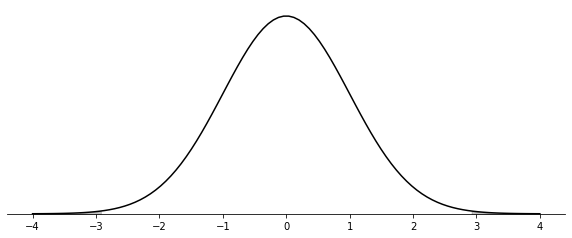

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# H0 : mu = 50 vs H1 : mu != 50
mu = 50

# samples
n = 500
x_bar = 48
s = 15.3

# statistic and p value
statistic = (x_bar - mu) / ( s / np.sqrt(n) )
p_value = stats.norm().sf(abs(statistic)) * 2
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

def plot_z_statisitc(statistic,ax,alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,statistic,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(statistic,4,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(statistic),100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
        x = np.linspace(abs(statistic),4,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())
   
fig, ax = plt.subplots(figsize=(10,4))
plot_z_statisitc(statistic,ax=ax,alternative='two-sided')
plt.show()

###### One sample t test

one sample t test

If $X_k$ are iid $N(\mu,\sigma^2)$,

$$\begin{array}{lcl}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{normal with mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{Property of $N$}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{Property of $t$}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx t(n-1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm t_*(n-1)\frac{s}{n}
\end{array}$$

one sample t test - toy example

In [ ]:
import numpy as np
from scipy import stats

# H0 : mu = 70 vs H1: mu > 70
samples = np.array([78, 83, 68, 72, 88])
n = samples.shape[0]
df = n - 1
x_bar = samples.mean()
s = samples.std(ddof=1)
mu = 70

t_star = stats.t(df=df).ppf(0.05)
statistic = ( x_bar - mu ) / ( s / np.sqrt(n) )
p_value = stats.t(df=df).sf(statistic) 
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

statistic : 2.1600102249246738
p value   : 0.04844399321974887


one sample t test (two-sided) - scipy.stats.ttest_1samp

H_0: mu=0 vs H_1: mu!=0
statistic = 0.5904283402851698
p_value   = 0.5562489158694675


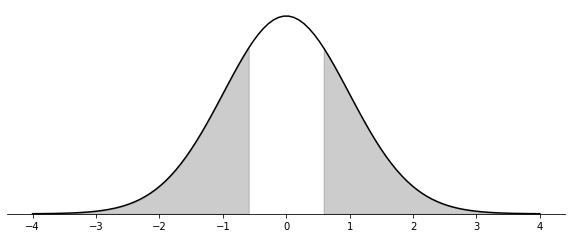

In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

# data
n = 100
sample = np.random.normal(size=(n,))

# test    
print("H_0: mu=0 vs H_1: mu!=0")
statistic, p_value = stats.ttest_1samp(sample, 0.0)
print(f"{statistic = }")
print(f"{p_value   = }")

# check test    
# x_bar = sample.mean()
# s = sample.std(ddof=1)
# n = sample.shape[0]
# mu = 0
# statistic = (x_bar - mu) / (s / np.sqrt(n))
# p_value = stats.t(n-1).sf(abs(statistic)) * 2
# print(f"{statistic = }")
# print(f"{p_value   = }")

def plot_t_statisitc(statistic,df,ax,alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.t(df).pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,statistic,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(statistic,4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(statistic),100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
        x = np.linspace(abs(statistic),4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())
   
fig, ax = plt.subplots(figsize=(10,4))
plot_t_statisitc(statistic,df=n-1,ax=ax,alternative='two-sided')
plt.show()

one sample t test (less) - scipy.stats.ttest_1samp

H_0: mu=0 vs H_1: mu<0
statistic = 0.5904283402851698
p_value   = 0.7218755420652663


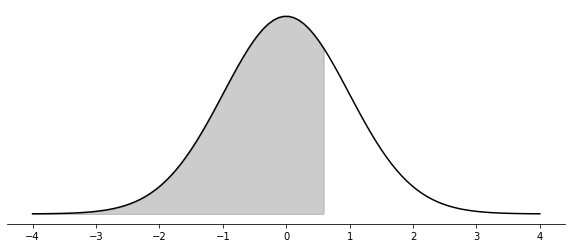

In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

# data
n = 100
sample = np.random.normal(size=(n,))

# test    
print("H_0: mu=0 vs H_1: mu<0")
statistic, p_value = stats.ttest_1samp(sample, 0.0, alternative='less')
print(f"{statistic = }")
print(f"{p_value   = }")

# check test    
# x_bar = sample.mean()
# s = sample.std(ddof=1)
# n = sample.shape[0]
# mu = 0
# statistic = (x_bar - mu) / (s / np.sqrt(n))
# p_value = stats.t(n-1).cdf(statistic) 
# print(f"{statistic = }")
# print(f"{p_value   = }")

def plot_t_statisitc(t_statistic,df,ax,alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.t(df).pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,t_statistic,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(t_statistic,4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(t_statistic),100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
        x = np.linspace(abs(t_statistic),4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks(())
   
fig, ax = plt.subplots(figsize=(10,4))
plot_t_statisitc(statistic,df=n-1,ax=ax,alternative='less')
plt.show()

one sample t test (greater) - scipy.stats.ttest_1samp

H_0: mu=0 vs H_1: mu>0
statistic = 0.5904283402851698
p_value   = 0.2781244579347337


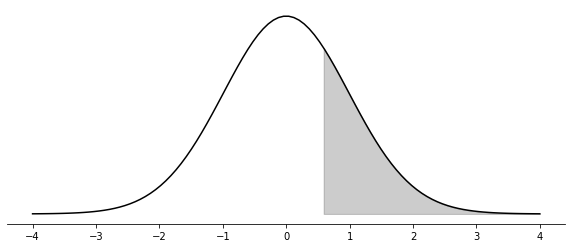

In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

# data
n = 100
sample = np.random.normal(size=(n,))

# test    
print("H_0: mu=0 vs H_1: mu>0")
statistic, p_value = stats.ttest_1samp(sample, 0.0, alternative='greater')
print(f"{statistic = }")
print(f"{p_value   = }")

# check test    
# x_bar = sample.mean()
# s = sample.std(ddof=1)
# n = sample.shape[0]
# mu = 0
# statistic = (x_bar - mu) / (s / np.sqrt(n))
# p_value = stats.t(n-1).sf(statistic) 
# print(f"{statistic = }")
# print(f"{p_value   = }")

def plot_t_statisitc(t_statistic,df,ax,alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.t(df).pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,t_statistic,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(t_statistic,4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(t_statistic),100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
        x = np.linspace(abs(t_statistic),4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks(())
   
fig, ax = plt.subplots(figsize=(10,4))
plot_t_statisitc(statistic,df=n-1,ax=ax,alternative='greater')
plt.show()

###### One sample proportion test

one sample proportion test

For large $n$ so that we can use the central limit theorem and the law of large numbers, or more specifically for large $n$ such that
$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5, n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5, n(1-p_0)\ge 5\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\hat{p}=\frac{\sum_{k=1}^n1_{A_k}}{n}\ \text{mean $p$, variance $\frac{p(1-p)}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\hat{p}
\approx N\left(p,\frac{p(1-p)}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}$$

one sample proportion test - scipy.stats.binomtest

In [ ]:
from scipy import stats
k = 110
n = 1000
p_0 = 0.1

# defaut - two-sided
result = stats.binomtest(k, n, p=p_0)
print(result.pvalue)

# two-sided
result = stats.binomtest(k, n, p=p_0, alternative="two-sided")
print(result.pvalue)

# greater
result = stats.binomtest(k, n, p=p_0, alternative="greater")
print(result.pvalue)

# less
result = stats.binomtest(k, n, p=p_0, alternative="less")
print(result.pvalue)

0.2916613019528088
0.2916613019528088
0.1582575301887018
0.8652235113276023


Exercise. Reproduce the above using the formula, not scipy.stats.binomtest.

###### one sample variance test

In [ ]:
n = 50
s = 2
sigma = 3
statistic = (n-1) * s**2 / sigma**2
p_value = stats.chi2(n-1).cdf(statistic)
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

###### two sample z test

$$
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim 
z
$$

In [ ]:
n_f = 100
n_s = 100
x_bar_f = 1.85
x_bar_s = 1.65
s_f = 1.3
s_s = 1.2
statistic = ( x_bar_f - x_bar_s ) / np.sqrt( s_f**2/n_f + s_s**2/n_s ) 
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

###### Two sample t test

two sample t test - equal variance

$$
\frac{(\bar{X}_1-\bar{X}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{s_p^2}{n_1}+\frac{s_p^2}{n_2}}}\sim t(n_1+n_2-1)
$$
where
$$
s_p^2
=\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}
=\frac{\sum_{i=1}^{n_1}\left(X^{(1)}_i-\bar{X}_1\right)^2+\sum_{i=1}^{n_2}\left(X^{(2)}_i-\bar{X}_2\right)^2}{n_1+n_2-2}
$$

two sample t test - unequal variance

$$
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim t\left(
    \frac{ \left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2 }
    {
        \frac{ \left(\frac{s_1^2}{n_1}\right)^2 }{ n_1 }
        +
        \frac{ \left(\frac{s_2^2}{n_2}\right)^2 }{ n_2 }
    }
    \right)
$$

###### two sample proportion test

two sample proportion test - equal variance ($p_1=p_2$)

$$
\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\frac{\hat{p}*(1-\hat{p}*)}{n_1}+\frac{\hat{p}*(1-\hat{p}*)}{n_2}}}\sim z
$$
where
$$
\hat{p}*
=\frac{x_1+x_2}{n_1+n_2}
$$

two sample proportion test - unequal variance ($p_1\neq p_2$)

$$
\frac{(\hat{p}_1-\hat{p}_2)-(p_1-p_2)}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}}\sim z
$$

###### two sample variance test

In [ ]:
n1 = 1000
s1 = 10
n2 = 500
s2 = 9
statistic = s1**2 / s2**2
p_value = stats.f(n1-1,n2-1).cdf(statistic)
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

###### paired sample z test

###### paired sample t test

### ***Chapter 12 Confidence Interval and Testing in Linear Regression***

###### (rule of tumb) confidence interval 

sigma square : 9
s square     : 9.70872110991394


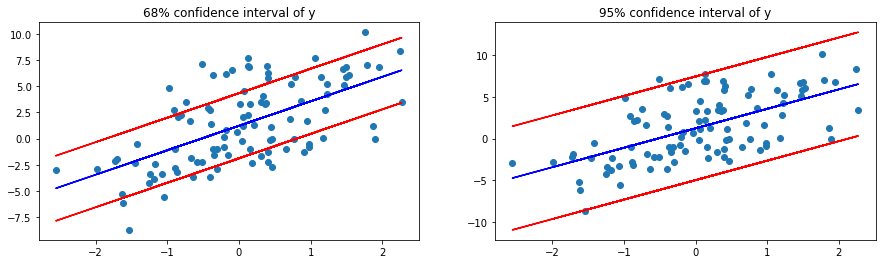

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,4))

# 68% (rule of tumb) confidence interval
# y_pred plus minus s
ax0.plot(x,y,'o')
ax0.plot(x,y_hat,'-b')
ax0.plot(x,y_hat+s,'-r')
ax0.plot(x,y_hat-s,'-r')
ax0.set_title('68% confidence interval of y')

# 95% (rule of tumb) confidence interval
# y_pred plus minus 2*s
ax1.plot(x,y,'o')
ax1.plot(x,y_hat,'-b')
ax1.plot(x,y_hat+2*s,'-r')
ax1.plot(x,y_hat-2*s,'-r')
ax1.set_title('95% confidence interval of y')

plt.show()

###### sampling distribution



$$\begin{array}{llc}
\text{Slope}&&\displaystyle
\frac{\hat{\beta}_1-\beta_1}{s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}\\
\\
\text{Resonse Expectation}&&\displaystyle
\frac{(\hat{\beta}_0+\hat{\beta}_1 x_0)-(\beta_0+\beta_1 x_0)}{s\sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}\\
\\
\text{Response}&&\displaystyle
\frac{(\hat{\beta}_0+\hat{\beta}_1 x_0)-(\beta_0+\beta_1 x_0+\varepsilon)}{s\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}
\end{array}$$

###### confidence interval




$$\begin{array}{llc}
\text{Slope}&&
\displaystyle
\hat{\beta}_1 \pm t_{n-2}(0.975)s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}\\
\\
\text{Resonse Expectation}&&\displaystyle
(\hat{\beta}_0+\hat{\beta}_1 x_0) \pm t_{n-2}(0.975)s\sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}\\
\\
\text{Response}&&\displaystyle
(\hat{\beta}_0+\hat{\beta}_1 x_0) \pm t_{n-2}(0.975)s\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}
\end{array}$$

sigma square : 9
s square     : 9.70872110991394


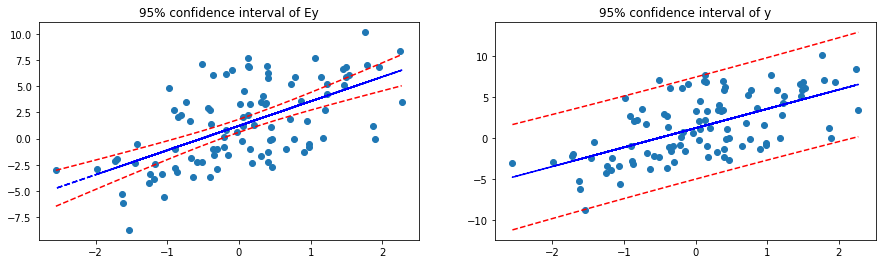

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)
print("sigma square : {}".format( sigma**2 ))
print("s square     : {}".format( s_square ))

# confidence interval for the expectation of y when x is given
x0 = np.linspace(x.min(),x.max(),20)
y0_hat = beta_hat * (x0 - x_bar) + y_bar
width = stats.t(n-2).ppf(0.975) * s * np.sqrt( (1/n) + (x0-x_bar)**2 / (np.sum( (x-x_bar)**2 )) ) 
upper = y0_hat + width
lower = y0_hat - width

# confidence interval for y itself when x is given
width2 = stats.t(n-2).ppf(0.975) * s * np.sqrt( 1 + (1/n) + (x0-x_bar)**2 / (np.sum( (x-x_bar)**2 )) ) 
upper2 = y0_hat + width2
lower2 = y0_hat - width2

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,4))

# plot confidence interval for the expectation of y when x is given
ax0.plot(x,y,'o')
ax0.plot(x,y_hat,'--b')
ax0.plot(x0,upper,'--r')
ax0.plot(x0,lower,'--r')
ax0.set_title('95% confidence interval of Ey')

# plot confidence interval for y itself when x is given
ax1.plot(x,y,'o')
ax1.plot(x,y_hat,'--b')
ax1.plot(x0,upper2,'--r')
ax1.plot(x0,lower2,'--r')
ax1.set_title('95% confidence interval of y')

plt.show()

###### testing


$$
H_0: \beta_1=0\quad\text{vs}\quad H_1: \beta_1\neq 0
$$

Under the null hypothesis

$$\displaystyle
\frac{\hat{\beta}_1}{s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}
$$

p value for testing H_0 : beta = 0 vs H_1 : beta != 0 : 1.9521947001526184e-11


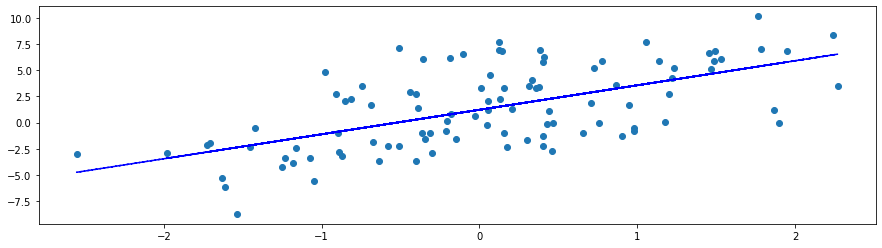

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)
print("sigma square : {}".format( sigma**2 ))
print("s square     : {}".format( s_square ))

# p value for testing H_0 : beta = 0 vs H_1 : beta != 0
t = beta_hat / ( s * np.sqrt( 1 / np.sum( (x-x_bar)**2 ) ) )
p_value = min( stats.t(n-2).cdf(t), stats.t(n-2).sf(t) ) * 2
print("p value for testing H_0 : beta = 0 vs H_1 : beta != 0 : {}".format(p_value))

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,'o')
ax.plot(x,y_hat,'--b')
plt.show()

###### statsmodels.api.OLS

house_sales

result.summary()
                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6672.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:50:18   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22682   BIC:                         6.304e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.2288     

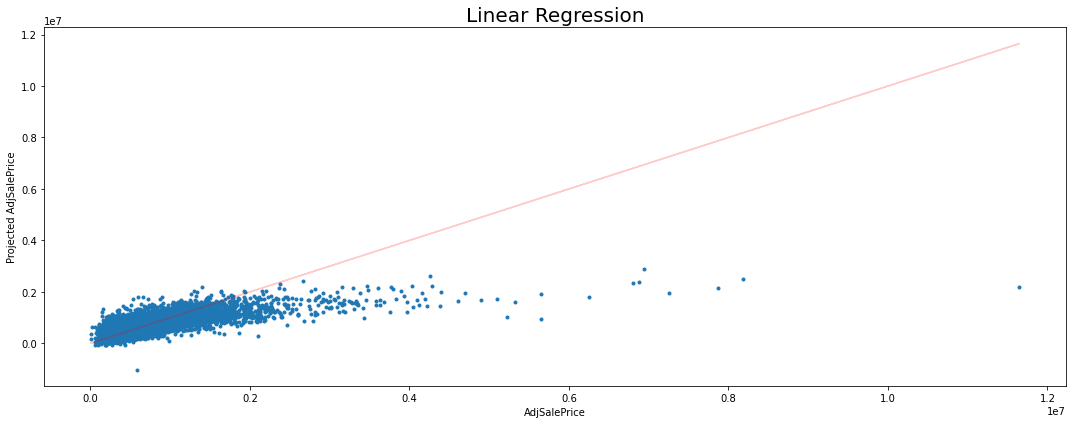

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/house_sales.csv'
    df = pd.read_csv(url, sep='\t')
    
    # predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
    # outcome = 'AdjSalePrice'
    # x = df[predictors]
    # y = df[outcome]
    
    # model = sm.OLS(y, x.assign(const=1))
    # result = model.fit()
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    predictors = ['SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']
    outcome = 'AdjSalePrice'
    x = df[predictors]
    y = df[outcome]
    
    model = sm.OLS(y, x.assign(const=1))
    result = model.fit()
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    y_pred = model.predict(result.params)
    
    fig, ax = plt.subplots(figsize=(15,6))
    
    ax.set_title("Linear Regression", fontsize=20)
    ax.plot(y, y_pred.reshape((-1,)), '.')
    ax.plot(y, y, '-r', alpha=0.2)
    
    ax.set_xlabel('AdjSalePrice')
    ax.set_ylabel('Projected AdjSalePrice')
            
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    result = main()

Advertising

result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg).fit()
result.summary()
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1256.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           6.75e-99
Time:                        12:23:36   Log-Likelihood:                -195.82
No. Observations:                 140   AIC:                             399.6
Df Residuals:                     136   BIC:                             411.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

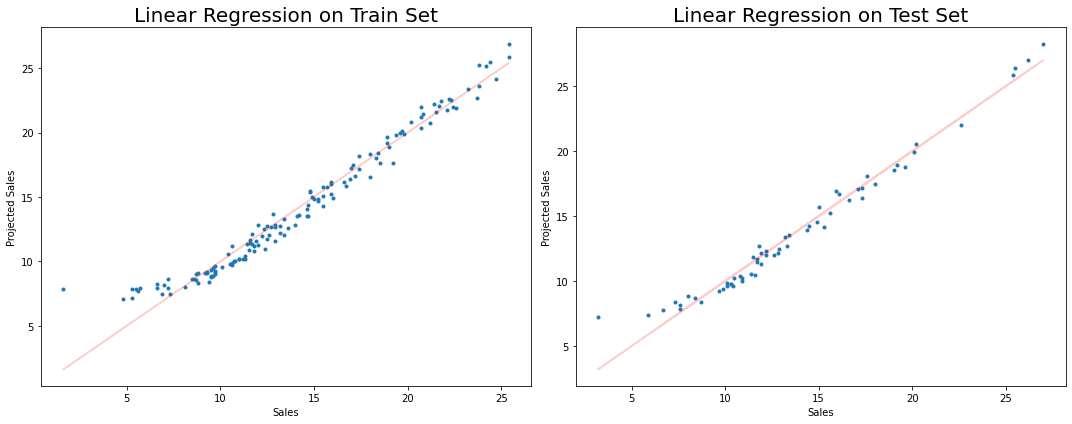

In [ ]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression


def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test


def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg = df.iloc[:num_data_train] 
    
    # result = sm.ols('Sales ~ TV + Radio + Newspaper', dg).fit()
    # print("result = sm.ols('Sales ~ TV + Radio + Newspaper', dg).fit()")
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    # result = sm.ols('Sales ~ TV + Radio', dg).fit()
    # print("result = sm.ols('Sales ~ TV + Radio', dg).fit()")
    # print("result.summary()")
    # print(result.summary(), end="\n\n")
    # print("-"*80, end="\n\n")
    
    result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg).fit()
    print("result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    df['TV:Radio'] = df['TV'] * df['Radio']
    x_train, y_train, x_test, y_test = train_test_split(df[['TV','Radio','TV:Radio','Sales']]) 
    print("x_train.shape = {}".format(x_train.shape))
    print("y_train.shape = {}".format(y_train.shape))
    print("x_test.shape = {}".format(x_test.shape))
    print("y_test.shape = {}".format(y_test.shape), end="\n\n")
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(f"{model.intercept_ = }")
    print(f"{model.coef_ = }", end="\n\n")
    
    print(f"{model.score(x_train, y_train) = }") # R^2
    print(f"{model.score(x_test, y_test) = }", end="\n\n") # R^2
    
    print(f"{metrics.mean_absolute_error(y_train, y_train_pred) = }")
    print(f"{metrics.mean_absolute_error(y_test, y_test_pred) = }", end="\n\n")
    
    print(f"{metrics.mean_squared_error(y_train, y_train_pred) = }")
    print(f"{metrics.mean_squared_error(y_test, y_test_pred) = }", end="\n\n")
    
    print(f"{np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)) = }")
    print(f"{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) = }", end="\n\n")
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,6))
    
    ax0.set_title("Linear Regression on Train Set", fontsize=20)
    ax0.plot(y_train.reshape((-1,)), y_train_pred.reshape((-1,)), '.')
    ax0.plot(y_train.reshape((-1,)), y_train.reshape((-1,)), '-r', alpha=0.2)
    
    ax1.set_title("Linear Regression on Test Set", fontsize=20)
    ax1.plot(y_test.reshape((-1,)), y_test_pred.reshape((-1,)), '.')
    ax1.plot(y_test.reshape((-1,)), y_test.reshape((-1,)), '-r', alpha=0.2)
    
    for ax in (ax0, ax1): 
        ax.set_xlabel('Sales')
        ax.set_ylabel('Projected Sales')
            
    plt.tight_layout()
    plt.show()
             
    
if __name__ == "__main__":
    main()

### ***Chapter 13 ANOVA***

####**Section 1 One Way ANOVA**

#####**Null of One Way ANOVA**

$$\begin{array}{cccccccc}
&&\text{Linear Regression}&&\text{One Way ANOVA}\\
\text{Model}&&y=\alpha+\beta x+\text{noise}
&&
y=\alpha+\sum_{i=1}^{c}\beta_i 1_{x\in C_i}+\text{noise}
\\
\text{H}_0&&\beta=0
&&
\quad\beta_1=\cdots=\beta_c\\
\end{array}$$

#####**Assumption**

- Indepedent Samples

- $y|x\in C_i)\sim N$

- $Var(y|x\in C_1)=Var(y|x\in C_2)=\cdots=Var(y|x\in C_c)$

#####**Data**



$$\begin{array}{cccccccccccc}
\text{Categories}&C_1&C_2&\cdots&C_c\\
\text{Samples}&y_{1j}&y_{2j}&\cdots&y_{cj}\\
\text{Number of Samples}&n_1&n_2&\cdots&n_c\\
\end{array}$$

#####**Sum of Squares**



$$\begin{array}{lll}
SS_{\text{Total}}
&=&
\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}\left(
\left(y_{ij}-\bar{y}_{i\cdot}\right)-\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(y_{ij}-\bar{y}_{i\cdot}\right)^2
+
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(y_{ij}-\bar{y}_{i\cdot}\right)^2
+
\sum_{i=1}^{c}n_i
\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)^2\\
&:=&\displaystyle
SS_{\text{Error}}
+
SS_{\text{Treatment}}\\
\end{array}$$

#####**ANOVA Table**



$$\begin{array}{cccccccccc}
\text{Factor}&\text{df}&\text{SS}&\text{MS}&\text{F}\\
\hline
\text{Treatment}&\displaystyle
c-1&\displaystyle
\text{SS}_{\text{Treatment}}&\displaystyle
\text{MS}_{\text{Treatment}}=\frac{\text{SS}_{\text{Treatment}}}{\text{df}_{\text{Treatment}}}&\displaystyle
\text{F}=\frac{\text{MS}_{\text{Treatment}}}{\text{MS}_{\text{Error}}}\\
\text{Error}&\displaystyle
n-c
&\displaystyle
\text{SS}_{\text{Error}}&\displaystyle
\text{MS}_{\text{Error}}=\frac{\text{SS}_{\text{Error}}}{\text{df}_{\text{Error}}}&\\
\hline
\text{Total}&\displaystyle
n-1&\displaystyle
\text{SS}_{\text{Total}}&&\\
\end{array}$$

where $n=\sum_{i=1}^cn_i$.

#####**Statistic**

$$F$$

#####**Sampling Distribution**











Under $H_0$

$$
F\sim F_{c-1,n-c}
$$

#####**Code - One Way ANOVA : scipy.stats.f_oneway**

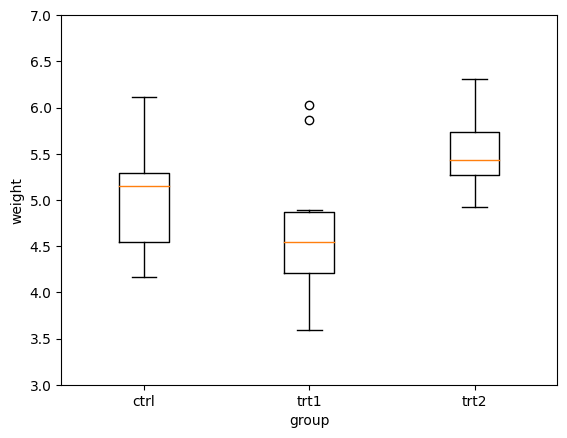

statistic = 4.846088
p_value = 0.01591


In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/PlantGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2])

    # data preprocess
    dg = df.groupby('group')
    data_a = dg.get_group('ctrl').weight 
    data_b = dg.get_group('trt1').weight 
    data_c = dg.get_group('trt2').weight

    # boxplot of weight for each group - control, treatment 1, and 2
    fig, ax = plt.subplots()
    ax.boxplot([data_a, data_b, data_c])
    ax.set_ylim(3, 7)
    ax.set_xlabel('group')
    ax.set_ylabel('weight')
    ax.set_xticks([1, 2, 3]) 
    ax.set_xticklabels(['ctrl', 'trt1', 'trt2'])
    plt.show()

    # one-way anova
    statistic, p_value = stats.f_oneway(data_a, data_b, data_c)
    print(f"{statistic = :.6f}")
    print(f"{p_value = :.5f}")

if __name__ == "__main__":
    main()

#####**Code - One Way ANOVA : statsmodels.formula.api.ols**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/PlantGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2])

    # one-way anova
    # the "C" indicates categorical data
    model = ols('weight ~ C(group)', df).fit()
    print(anova_lm(model))

if __name__ == "__main__":
    main()

            df    sum_sq   mean_sq         F   PR(>F)
C(group)   2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


####**Section 2 Two Way ANOVA**

#####**Null of One Way ANOVA**

$$\begin{array}{cccccccc}
&&\text{Linear Regression}&&\text{One Way ANOVA}\\
\text{Model}&&y=\alpha+\beta x+\text{noise}
&&
y=\alpha+\sum_{i=1}^{c}\beta_i 1_{x\in C_i}+\text{noise}
\\
\text{H}_0&&\beta=0
&&
\quad\beta_1=\cdots=\beta_c\\
\end{array}$$

#####**Null of Two Way ANOVA**

$$\begin{array}{ccc}
&&\text{Linear Regression}&&\text{Two Way ANOVA}\\
\text{Model}&&y=\alpha+\beta_1 x_1+\beta_2 x_2 + \gamma x_1x_2
&&
y=\alpha+\sum_{i=1}^{a}\beta^{(1)}_i 1_{C^{(1)}_i}
+\sum_{j=1}^{b}\beta^{(2)}_j 1_{C^{(2)}_j}
+\sum_{i\neq j}\beta_{ij} 1_{C^{(1)}_iC^{(2)}_j}\\
\text{H}_0&&\beta_1=0
&&\quad\text{all }\beta^{(1)}_{i}=0\\
\text{H}_0&&\beta_2=0
&&\quad\text{all }\beta^{(2)}_{j}=0\\
\text{H}_0&&\gamma=0&&\quad\text{all }\beta_{ij}=0\\
\end{array}$$

#####**Sum of Squares**

$$\begin{array}{lll}
SS_{\text{Total}}
&=&
\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(y_{ijk}-\bar{y}_{\cdot\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}bm\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{j=1}^{b}am\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}m\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)^2\\
&:=&\displaystyle
SS_{\text{Treatment}_1}
+SS_{\text{Treatment}_2}
+SS_{\text{Interaction}}
+SS_{\text{Error}}\\
\end{array}$$

#####**ANOVA Table**



$$\begin{array}{cccccccccc}
\text{Factor}&\text{df}&\text{SS}&\text{MS}&\text{F}&\text{H}_0\\
\hline
\text{Treatment 1}&\displaystyle
a-1&\displaystyle
\text{SS}_{\text{Treatment}_1}&\displaystyle
\text{MS}_{\text{Treatment}_1}=\frac{\text{SS}_{\text{Treatment}_1}}{\text{df}_{\text{Treatment}_1}}&\displaystyle
\frac{\text{MS}_{\text{Treatment}_1}}{\text{MS}_{\text{Error}}}
&\text{all }\beta^{(1)}_{i}=0\\
\text{Treatment 2}&\displaystyle
b-1&\displaystyle
\text{SS}_{\text{Treatment}_2}&\displaystyle
\text{MS}_{\text{Treatment}_2}=\frac{\text{SS}_{\text{Treatment}_2}}{\text{df}_{\text{Treatment}_2}}&\displaystyle
\frac{\text{MS}_{\text{Treatment}_2}}{\text{MS}_{\text{Error}}}
&\text{all }\beta^{(2)}_{i}=0\\
\text{Interaction}&\displaystyle
(a-1)(b-1)&\displaystyle
\text{SS}_{\text{Interaction}}&\displaystyle
\text{MS}_{\text{Interaction}}=\frac{\text{SS}_{\text{Interaction}}}{\text{df}_{\text{Interaction}}}&\displaystyle
\frac{\text{MS}_{\text{Interaction}}}{\text{MS}_{\text{Error}}}
&\text{all }\beta_{ij}=0\\
\text{Error}&\displaystyle
ab(m-1)
&\displaystyle
\text{SS}_{\text{Error}}&\displaystyle
\text{MS}_{\text{Error}}=\frac{\text{SS}_{\text{Error}}}{\text{df}_{\text{Error}}}&\\
\hline
\text{Total}&\displaystyle
abm-1&\displaystyle
\text{SS}_{\text{Total}}&&\\
\end{array}$$

#####**Code - Two Way ANOVA : statsmodels.formula.api.ols**

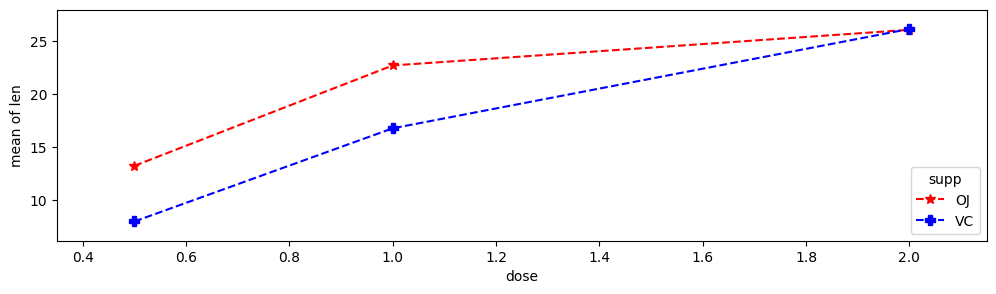

,df,sum_sq,mean_sq,F,PR(>F)
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp):C(dose),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/ToothGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2,3])

    # interaction_plot
    fig, ax = plt.subplots(figsize=(12,3))
    interaction_plot(df.dose, df.supp, df.len, 
                    colors=['red','blue'], markers=['*','P'], markersize=7, ax=ax, legendloc='lower right', linestyles=["--","--"])
    plt.show()

    # two-way anova
    # the "C" indicates categorical data
    model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()
    anova_lm(model)

if __name__ == "__main__":
    main()

###**Chapter 14 Chi-Square Test**

####**Section 1 Chi-Square Distribution $\chi^2_d$**

#####**Definition - Chi-Square Distribution**



$$
\sum_{i=1}^dZ_i^2\sim\chi^2_d\quad\quad\quad\quad\text{where$\quad$ $Z_i\quad$ IID $\quad N(0,1^2)$}
$$

#####**Code - Simulation of Chi-Square Distribution using Definition**

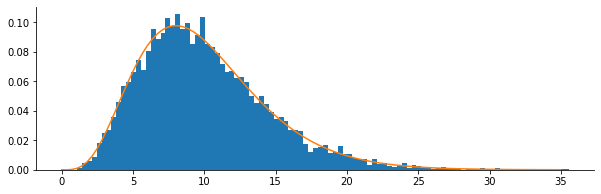

In [ ]:
def main():
    df = 10
    n_samples = 10_000
    
    normal_samples = np.random.normal(size=(n_samples, df)) # (10000, 5)
    chi_square_samples = np.sum(normal_samples**2, axis=1) # (10000,)
    
    fig, ax = plt.subplots(figsize=(10,3))
    
    ax.hist(chi_square_samples, bins=100, density=True)
    
    x = np.linspace(0, 35, 100)
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.show()
    
    
if __name__ == "__main__":
    main()

#####**Code - Simulation of Chi-Square Distribution using Numpy and Scipy.Stats Package**

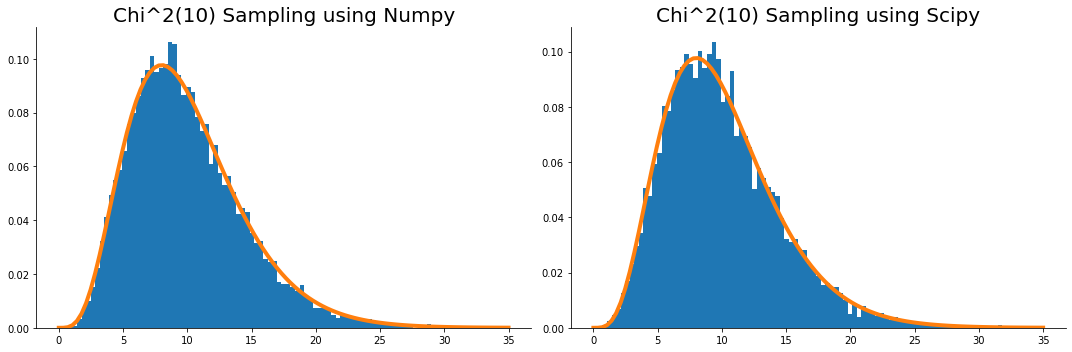

In [ ]:
from scipy import special

def main():
    sample_size = 10_000
    df = 10
    df_ = df / 2
    const = (1/2)**df_ / special.gamma(df_) 

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title(f"Chi^2({df}) Sampling using Numpy", fontsize=20)
    
    x = np.random.chisquare(df, size=(sample_size,))
    x_fig = np.linspace(0,35,100)
    y_fig = const * x_fig**( df_ - 1 ) * np.exp( - x_fig / 2 )
    
    ax0.hist(x, density=True, bins=x_fig)
    ax0.plot(x_fig, y_fig, linewidth=4)
    
    ax1.set_title(f"Chi^2({df}) Sampling using Scipy", fontsize=20)
    
    x = stats.chi2(df).rvs(size=10_000)
    #x_fig = np.linspace(0,35,100)
    y_fig = stats.chi2(df).pdf(x_fig)
    
    ax1.hist(x, density=True, bins=x_fig)
    ax1.plot(x_fig, y_fig, linewidth=4)
    
    for ax in (ax0, ax1):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

####**Section 2 Goodness of Fit Test [eng](https://www.youtube.com/watch?v=ZNXso_riZag&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=8)**

#####**Question to Answer**

We have a dice. To test whether it is loaded, we roll it 60 times, and here is the outcome. Decide whether this dice is loaded.


$$\begin{array}{crr}
&\text{observed}&\text{expected}\\
\text{value}&\text{frequency}&\text{frequency}\\\hline
1&5&10\\
2&7&10\\
3&17&10\\
4&14&10\\
5&8&10\\
6&9&10\\\hline
\text{sum}&60&60
\end{array}$$

#####**Too Many 3's, but ...**

If we apply the (two-sided) $z$ test that the probability of having 3 is $1/6$,
then the $z$ statistic is
$$
\frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}
=
\frac{\frac{17}{60}-\frac{1}{6}}{\sqrt{\frac{\frac{1}{6}(1-\frac{1}{6})}{10}}}
\approx
2.42
$$
and the corresponding p-value is 1.53%. 

In [ ]:
def main():
    p_0 = 1/6
    p_hat = 17/ 60
    n = 60

    # z test statistic
    statistic = (p_hat-p_0) / np.sqrt( p_0 * (1-p_0) / n )

    # two-sided test
    p_value = stats.norm().sf(abs(statistic)) * 2

    print(f"{statistic = :.02f}")
    print(f"{p_value    = :.02%}")

if __name__ == "__main__":
    main()

statistic = 2.42
p_value    = 1.53%


Is this good enough evidence that the die is loaded?

Not too fast. We can run a similar test for each row. If we have many rows, we will eventually see a very small p-value. It’s like playing Russian roulette. If we keep on going, sooner or later, we will hit a very small p-value even if the die is fair. So, we cannot conclude that the die is loaded yet. 

#####**Null and Alternative**




$$\begin{array}{lll}
\text{Null}&\text{Dice is not loaded}\\
&\text{Observed frequencies are close to expected frequencies}\\
\\
\text{Alternative}&\text{Dice is loaded}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
\end{array}$$

#####**Statistic**



$$
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
=
\frac{(5-10)^2}{10}+\frac{(7-10)^2}{10}+\frac{(17-10)^2}{10}+
\frac{(14-10)^2}{10}+\frac{(8-10)^2}{10}+\frac{(9-10)^2}{10}
=
10.4
$$



In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic = np.sum( (observed-expected)**2 / expected )
    print(f'{statistic = }')

if __name__ == "__main__":
    main()

statistic = 10.4


#####**Critical Region**

$$\begin{array}{lll}
\text{Null}&\text{Dice is not loaded}\\
&\text{Observed frequencies are close to expected frequencies}\\
&O_i\approx E_i\quad\Rightarrow\quad\text{statistic}\approx 0\\
\\
\text{Alternative}&\text{Dice is loaded}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
&O_i\not\approx E_i\quad\Rightarrow\quad\text{statistic}\approx\text{large positive number}\\
\end{array}$$

#####**Sampling Distribution**

$$\begin{array}{lll}
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
&=&\displaystyle
\sum_{i=1}^k\frac{\left(\left(\sum_{j=1}^{n}X_j\right)-np_i\right)^2}{np_i}\\
&=&\displaystyle
\sum_{i=1}^k\left(\frac{\left(\sum_{j=1}^{n}X_j\right)-np_i}{\sqrt{np_i}}\right)^2\\
&\approx&\displaystyle
\sum_{i=1}^k\left(\frac{\left(\sum_{j=1}^{n}X_j\right)-np_i}{\sqrt{np_i(1-p_i)}}\right)^2\\
&\approx&\displaystyle
\sum_{i=1}^kZ_i^2\\
&=&\displaystyle
\chi^2_{k-1}\\
\end{array}$$

In this dice case
$$
\displaystyle
\sum_{i=1}^6\frac{(O_i-E_i)^2}{E_i}
\approx
\chi^2_5
$$

#####**Degree of Freedom**

$$
\text{degrees of freedom}
=
\text{number of summation terms in chi square statistic}-1
$$

$$\begin{array}{crrr}
&\text{observed}&\text{expected}\\
\text{value}&\text{frequency}&\text{frequency}&\text{free or not}\\\hline
1&5&10&\text{free}\\
2&7&10&\text{free}\\
3&17&10&\text{free}\\
4&14&10&\text{free}\\
5&8&10&\text{free}\\
6&\color{red}{9}&\color{red}{10}&\color{red}{\text{not free}}\\\hline
\text{sum}&60&60
\end{array}$$

In this dice case
$$
\text{degrees of freedom}
=
6-1
=
5
$$

#####**[Bit of History](https://en.wikipedia.org/wiki/Chi-squared_test)**

In 1900, Pearson published a paper[2] claimed that as $n\rightarrow\infty$
$$
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
\Rightarrow
\chi^2_{k-1}
$$
However, 
there was some controversy in practical applications, and it was not settled for 20 years
until Fisher's 1922 and 1924 papers.[8][9]



#####**Rule of Thumb**

The $\chi^2$ approximation is good when all the expected frequencies are five or more. In this dice case, all the expected frequencies are five or more. Hence, the $\chi^2$ approximation is reasonable.



#####**p-value**

$$\begin{array}{lll}
\text{p-value}
&=&\displaystyle
P\left(\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}\ge\text{statistic}\Big|H_0\right)
\end{array}$$

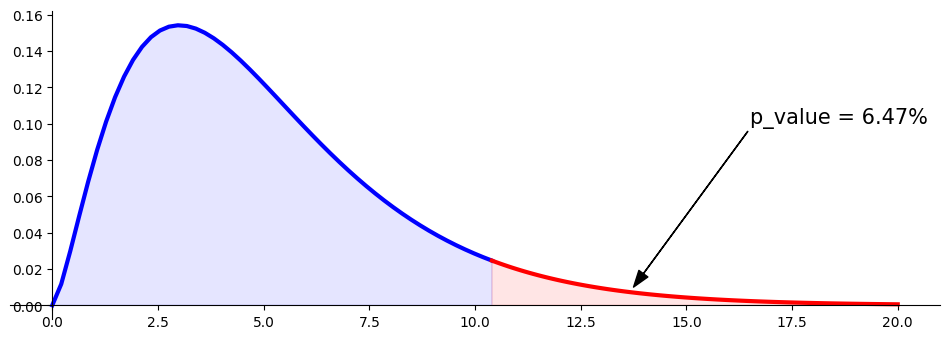

In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic = np.sum( (observed-expected)**2 / expected )
    df = observed.shape[0] - 1
    p_value = stats.chi2(df).sf(statistic) 
    
    fig, ax = plt.subplots(figsize=(12,4))

    x = np.linspace(0, statistic) 
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y, color='b', linewidth=3)

    x = np.concatenate([[0], x, [statistic], [0]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='b', alpha=0.1)

    x = np.linspace(statistic, 20, 100)
    y = stats.chi2(df).pdf(x) 
    ax.plot(x, y, color='r', linewidth=3)

    x = np.concatenate([[statistic], x, [20], [statistic]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='r', alpha=0.1)

    xy = ((12.5 + 15.0) / 2, 0.01)
    xytext = (16.5, 0.10)
    arrowprops = dict(color='k', width=0.2, headwidth=8)
    ax.annotate(f'{p_value = :.02%}', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.spines['left'].set_position("zero")
    
    plt.show() 
       
if __name__ == "__main__":
    main()

#####**Conclusion**

$$\text{The dice is not loaded.}$$

#####**Code - Goodness of Fit Test : scipy.stats.chisquare [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)**

In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic, p_value = stats.chisquare(observed, f_exp=expected)
    print(f"{statistic = :.02f}")
    print(f"{p_value    = :.02%}")
   
if __name__ == "__main__":
    main()

statistic = 10.40
p_value    = 6.47%


####**Section 3 Independence Test [eng](https://www.youtube.com/watch?v=NTHA9Qa81R8&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=6)**

#####**Question to Answer**

We randomly selected several people and recorded their sex and dominant hand. Here is the data. 

**observed**
$$\begin{array}{ccc|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&956&1,048&2,004\\
\text{left-handed}&98&107&205\\
\text{ambidextrous}&13&15&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

Is there any relationship between sex and the dominant hand, or these two variables are independent?

#####**Null and Alternative**




$$\begin{array}{lll}
\text{Null}&\text{They are independent}\\
&\text{Observed frequencies are close to expected frequencies}\\
\\
\text{Alternative}&\text{They are not independent}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
\end{array}$$

#####**If they are independent**

######**observed**



$$\begin{array}{crr|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&934&1,070&2,004\\
\text{left-handed}&113&92&205\\
\text{ambidextrous}&20&8&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

######**expected**



$$\begin{array}{ccc|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&956&1,048&2,004\\
\text{left-handed}&98&107&205\\
\text{ambidextrous}&13&15&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

######**How to get Expected**

$$\begin{array}{lll}
\displaystyle
P(\text{men})=\frac{1067}{2237},\
P(\text{right-handed})=\frac{2004}{2237}
&\Rightarrow&\displaystyle
P(\text{men},\text{right-handed})
=\frac{1067}{2237}\times\frac{2004}{2237}\\
&\Rightarrow&\displaystyle
\text{expected_frequency}(\text{men},\text{right-handed})
=\frac{1067}{2237}\times\frac{2004}{2237}\times 2237\approx 956\\
\end{array}$$

######**Code - How to get Expected**

In [ ]:
def compute_expected(observed):
    observed = np.array([[934,1070],[113,92],[20,8]])
    row_sum = observed.sum(axis=1)
    row_pmf = row_sum.reshape((-1,1)) / row_sum.sum() # (3, 1)

    column_sum = observed.sum(axis=0)
    column_pmf = column_sum.reshape((1,-1)) / column_sum.sum() # (1, 2)

    joint_pmf = row_pmf * column_pmf # (3, 2)
    expected = joint_pmf * row_sum.sum()
    return expected
    
def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    expected = compute_expected(observed)
    print(expected) 

if __name__ == "__main__":
    main()

[[ 955.86410371 1048.13589629]
 [  97.78050961  107.21949039]
 [  13.35538668   14.64461332]]


#####**Statistic and Sampling Distribution**

$$
\displaystyle
\sum_{i=1}^{n_i}\sum_{j=1}^{n_j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim
\chi^2_{(n_i-1)(n_j-1)}
$$

where

$$
\displaystyle
p_i
=
\frac{O_{i\cdot}}{O_{\cdot\cdot}},\quad
p_j
=
\frac{O_{\cdot j}}{O_{\cdot\cdot}},\quad
E_{ij}
=
p_ip_jO_{\cdot\cdot}
$$

#####**Degrees of Freedom**

$$
\text{degrees of freedom}
=
(\text{num of first sum}-1)
(\text{num of second sum}-1)
$$

#####**Critical Region**

$$\begin{array}{lll}
\text{Null}&\text{They are independent}\\
&\text{Observed frequencies are close to expected frequencies}\\
&O_{ij}\approx E_{ij}\quad\Rightarrow\quad\text{statistic}\approx 0\\
\\
\text{Alternative}&\text{They are not independent}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
&O_{ij}\not\approx E_{ij}\quad\Rightarrow\quad\text{statistic}\approx\text{large positive number}\\
\end{array}$$

#####**p-value**

$$\begin{array}{lll}
\text{p-value}
&=&\displaystyle
P\left(\sum_{i=1}^{n_i}\sum_{j=1}^{n_j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\ge\text{statistic}\Big|H_0\right)
\end{array}$$

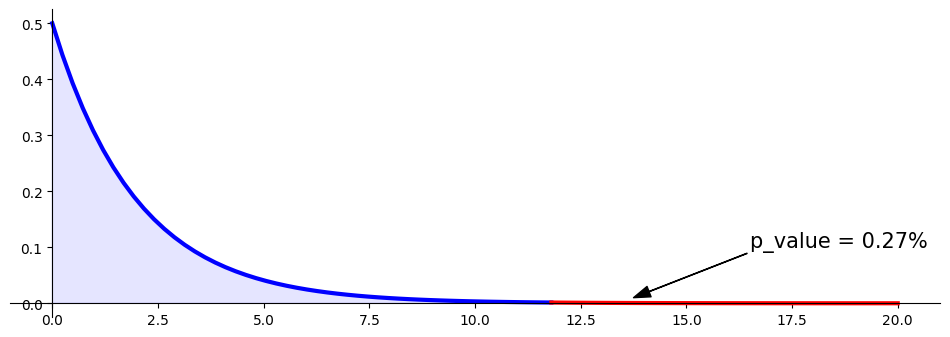

In [ ]:
def compute_expected(observed):
    observed = np.array([[934,1070],[113,92],[20,8]])
    row_sum = observed.sum(axis=1)
    row_pmf = row_sum.reshape((-1,1)) / row_sum.sum() # (3, 1)

    column_sum = observed.sum(axis=0)
    column_pmf = column_sum.reshape((1,-1)) / column_sum.sum() # (1, 2)

    joint_pmf = row_pmf * column_pmf # (3, 2)
    expected = joint_pmf * row_sum.sum()
    return expected

def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    expected = compute_expected(observed)

    statistic = np.sum( (observed-expected)**2 / expected )
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    p_value = stats.chi2(df).sf(statistic) 
    
    fig, ax = plt.subplots(figsize=(12,4))

    x = np.linspace(0, statistic) 
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y, color='b', linewidth=3)

    x = np.concatenate([[0], x, [statistic], [0]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='b', alpha=0.1)

    x = np.linspace(statistic, 20, 100)
    y = stats.chi2(df).pdf(x) 
    ax.plot(x, y, color='r', linewidth=3)

    x = np.concatenate([[statistic], x, [20], [statistic]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='r', alpha=0.1)

    xy = ((12.5 + 15.0) / 2, 0.01)
    xytext = (16.5, 0.10)
    arrowprops = dict(color='k', width=0.2, headwidth=8)
    ax.annotate(f'{p_value = :.02%}', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.spines['left'].set_position("zero")
    
    plt.show() 
       
if __name__ == "__main__":
    main()

#####**Conclusion**

$$\text{They are not independent.}$$

#####**Code - Independence Test : scipy.stats.chi2_contingency [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)**

In [ ]:
def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    statistic, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)
    print(f"{p_value = :.02%}")
   
if __name__ == "__main__":
    main()

p_value    = 0.27%


####**Section 4 Homogeneity Test [eng](https://www.youtube.com/watch?v=hoibLM5CngE)**

#####**Procedure of Homogeneity Test = Procedure of Independence Test**

Procedure of homogeneity test is identical to that of 
independence test.

$$
\text{Procedure of Homogeneity Test}
=
\text{Procedure of Independence Test}
$$

#####**Data Collection of Homogeneity Test $\neq$ Data Collection of Independence Test**



However, the data collection methods are differnt.

$$
\text{Data Collection of Homogeneity Test}
\neq
\text{Data Collection of Independence Test}
$$

$$\begin{array}{cc}
\text{Independence Test}&\text{Homogeneity Test}\\\hline
(x_i,y_i)\ \text{collected}& x_i\ \text{collected given $y$}
\end{array}$$

#####**Question to Answer**

For each country, we asked how people in the country feel about the hospital quality from five stars to one star. Here is the data.

**observed**
$$\begin{array}{cccc}
\text{Hospital Quality}&\text{US}&\text{Canada}&\text{Mexico}\\\hline
\text{5 Star}&541&75&231\\
\text{4 Star}&498&71&213\\
\text{3 Star}&779&96&321\\
\text{2 Star}&282&50&345\\
\text{1 Star}&65&19&120\\
\end{array}$$

Is the hospital satisfaction level distribution homogeneous among the countries, or do some differ?

#####**Code - Homogeneity Test : scipy.stats.chi2_contingency [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)**

In [ ]:
def main():
    observed = np.array([[541,75,231],[498,71,213],[779,96,321],[282,50,345],[65,19,120]])
    statistic, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)
    print(f"{p_value = :.02%}")
   
if __name__ == "__main__":
    main()

p_value = 0.00%
